## PROJECT MACHINE LEARNING

### Problem 1:

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## **Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape

(1525, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
df.isin([0]).sum()

Unnamed: 0                   0
vote                         0
age                          0
economic.cond.national       0
economic.cond.household      0
Blair                        0
Hague                        0
Europe                       0
political.knowledge        455
gender                       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [12]:
cat=df.select_dtypes(['object'])
cat.describe()

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [13]:
skew=np.round(df.skew(),2)
dfskew=pd.DataFrame(data=skew,columns=['Skewness'])
dfskew

,Skewness
age,0.14
economic.cond.national,-0.24
economic.cond.household,-0.15
Blair,-0.54
Hague,0.15
Europe,-0.14
political.knowledge,-0.43


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

### Univariate Analysis
Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of age
----------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

 Skewness of age
----------------------------------------------------------------------------
0.1446

 Histogram and Boxplot of age
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


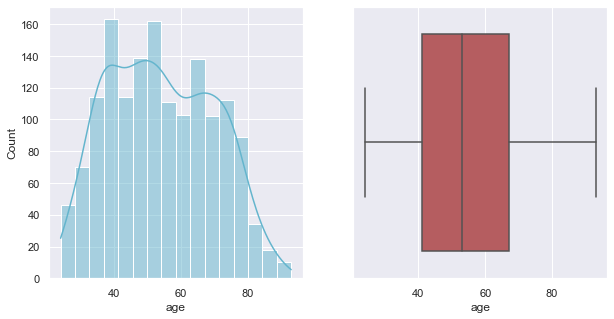

None
Description of economic.cond.national
----------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

 Skewness of economic.cond.national
----------------------------------------------------------------------------
-0.2405

 Histogram and Boxplot of economic.cond.national
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


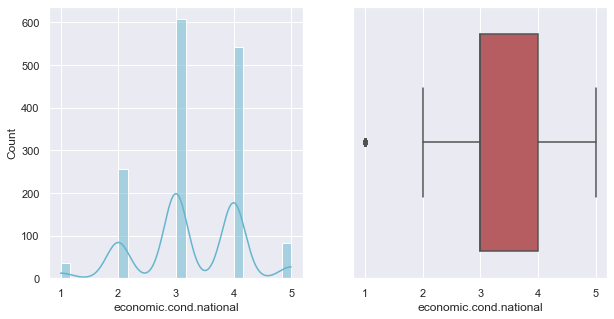

None
Description of economic.cond.household
----------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

 Skewness of economic.cond.household
----------------------------------------------------------------------------
-0.1496

 Histogram and Boxplot of economic.cond.household
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


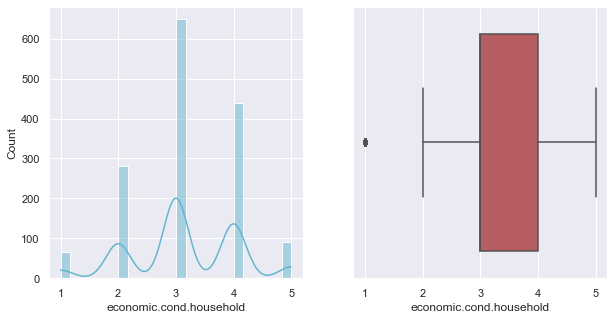

None
Description of Blair
----------------------------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

 Skewness of Blair
----------------------------------------------------------------------------
-0.5354

 Histogram and Boxplot of Blair
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


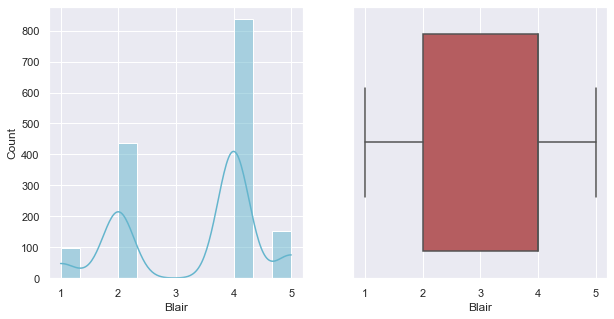

None
Description of Hague
----------------------------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

 Skewness of Hague
----------------------------------------------------------------------------
0.1521

 Histogram and Boxplot of Hague
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


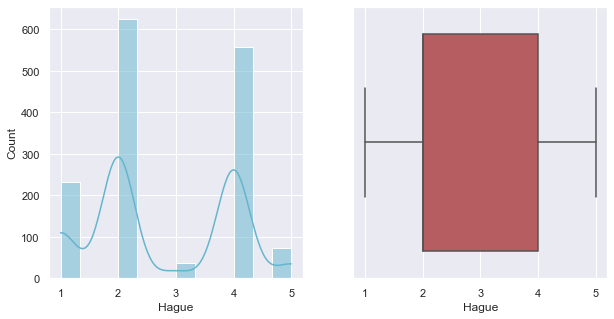

None
Description of Europe
----------------------------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

 Skewness of Europe
----------------------------------------------------------------------------
-0.1359

 Histogram and Boxplot of Europe
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


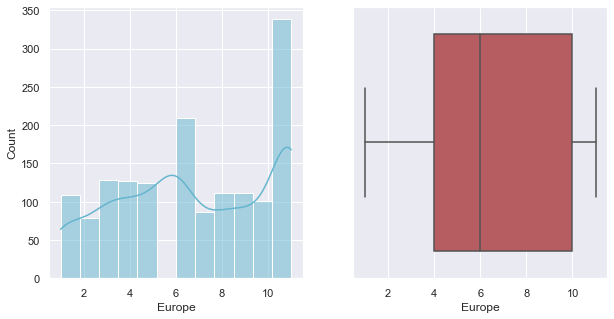

None
Description of political.knowledge
----------------------------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

 Skewness of political.knowledge
----------------------------------------------------------------------------
-0.4268

 Histogram and Boxplot of political.knowledge
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


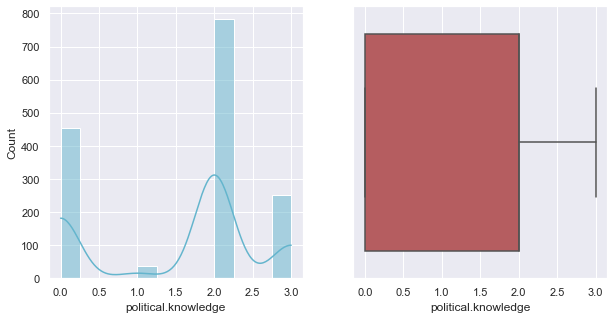

None


In [15]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(univariateAnalysis_numeric(column,30))
       

### VOTE 

In [16]:
v_count=df['vote'].value_counts()
v_count

Labour          1063
Conservative     462
Name: vote, dtype: int64

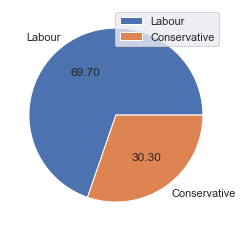

In [17]:
labels=df.vote.unique()
plt.pie(x=v_count,labels=labels,autopct="%.2f")
plt.legend()
plt.show();

In [18]:
# Vote and Age

<AxesSubplot:xlabel='age', ylabel='count'>

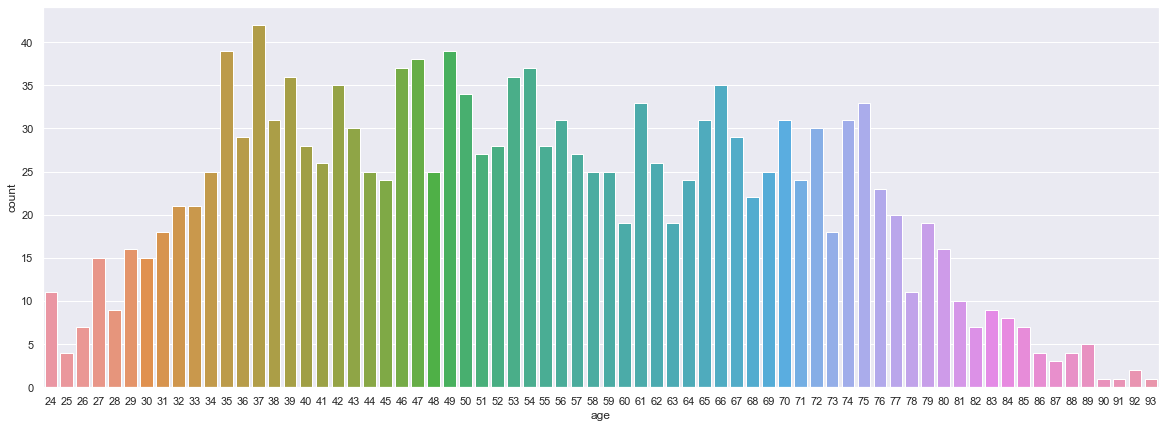

In [19]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data=df)

<AxesSubplot:xlabel='vote', ylabel='age'>

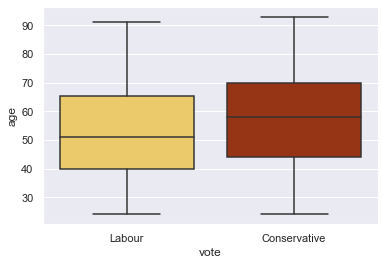

In [20]:
sns.boxplot(x="vote", y="age", data=df,palette='afmhot_r')

In [21]:
# Vote and Gender

<Figure size 720x432 with 0 Axes>

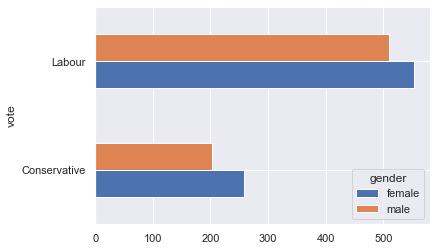

In [22]:
plt.figure(figsize=(10,6))
pd.crosstab(df['vote'],df['gender']).plot(kind='barh');

In [23]:
# Vote and Economic Condn National

<AxesSubplot:xlabel='vote', ylabel='economic.cond.national'>

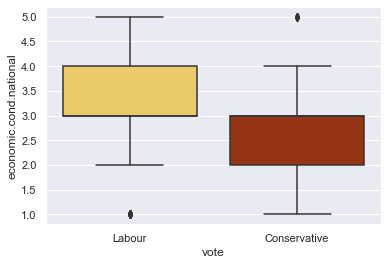

In [24]:
sns.boxplot(x="vote", y="economic.cond.national", data=df,palette='afmhot_r')

<Figure size 720x432 with 0 Axes>

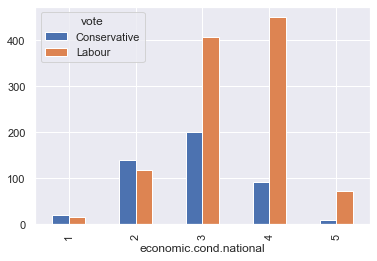

In [25]:
plt.figure(figsize=(10,6))
pd.crosstab(df['economic.cond.national'],df['vote']).plot(kind='bar');
plt.show();

In [26]:
# Vote and Economic Condn Household

<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

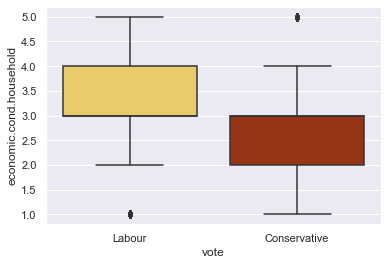

In [27]:
sns.boxplot(x="vote", y="economic.cond.household", data=df,palette='afmhot_r')

<Figure size 720x432 with 0 Axes>

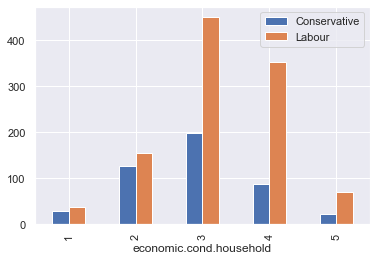

In [28]:
plt.figure(figsize=(10,6))
pd.crosstab(df['economic.cond.household'],df['vote']).plot(kind='bar');
plt.legend()

In [29]:
# Vote and Blair

<Figure size 720x432 with 0 Axes>

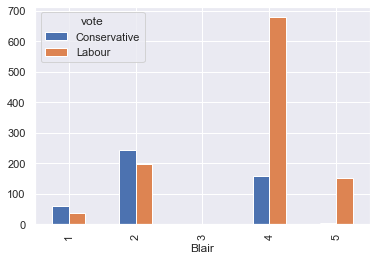

In [30]:
plt.figure(figsize=(10,6))
pd.crosstab(df['Blair'],df['vote']).plot(kind='bar');

In [31]:
# Vote and Hague

<Figure size 720x432 with 0 Axes>

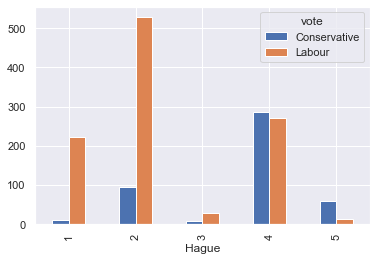

In [32]:
plt.figure(figsize=(10,6))
pd.crosstab(df['Hague'],df['vote']).plot(kind='bar');

In [33]:
# Vote and political.knowledge

<Figure size 720x432 with 0 Axes>

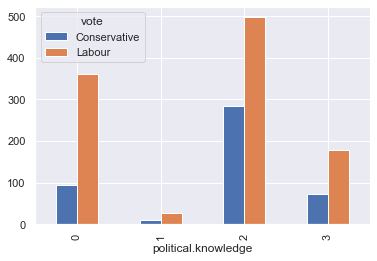

In [34]:
plt.figure(figsize=(10,6))
pd.crosstab(df['political.knowledge'],df['vote']).plot(kind='bar');

In [35]:
# Vote and Europe

<Figure size 720x432 with 0 Axes>

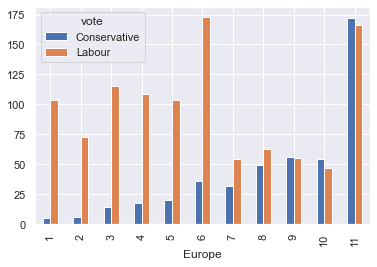

In [36]:
plt.figure(figsize=(10,6))
pd.crosstab(df['Europe'],df['vote']).plot(kind='bar');

In [37]:
# Bivariate

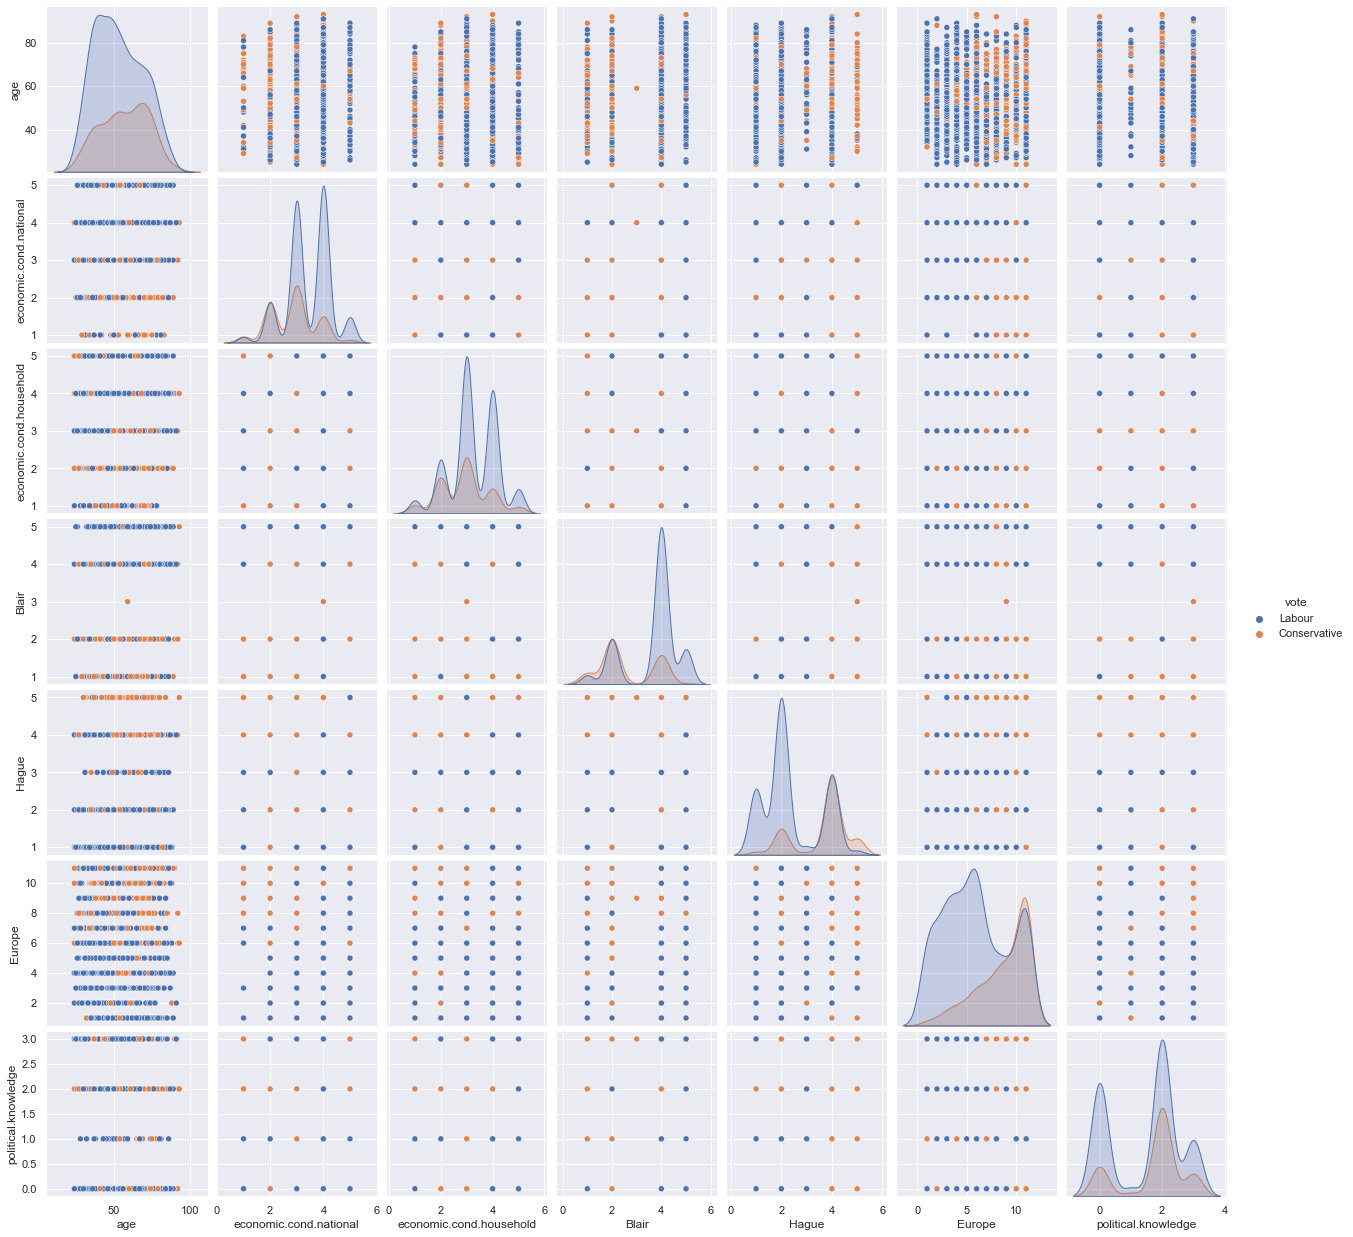

In [38]:
sns.pairplot(df,diag_kind='kde',hue='vote')

<AxesSubplot:>

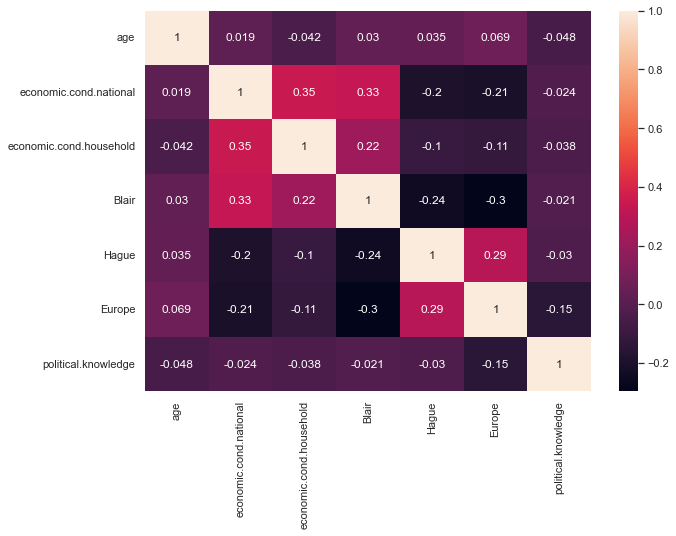

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

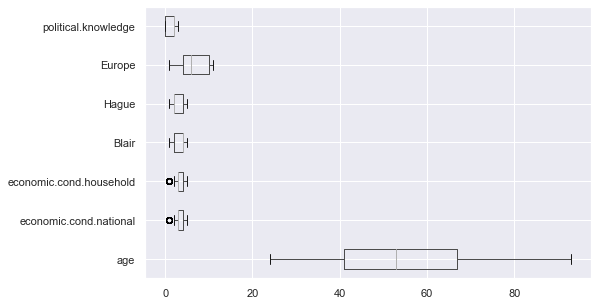

In [40]:
plt.figure(figsize=(8,5))
df.boxplot(vert=0)
plt.show()

In [41]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [42]:
num=df.select_dtypes(['int64'])

In [43]:
def detect_outliers(num):
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [44]:
for i in num:
    lr,ur=detect_outliers(df[i])
    print('\n')
    print(i)
    print('--------------')
    print('Lower Range',lr)
    print('Upper Range',ur)
    print('Proportion of outliers is',np.round(len(df[df[i]<lr])*100/len(df[i]),decimals=2))



age
--------------
Lower Range 2.0
Upper Range 106.0
Proportion of outliers is 0.0


economic.cond.national
--------------
Lower Range 1.5
Upper Range 5.5
Proportion of outliers is 2.43


economic.cond.household
--------------
Lower Range 1.5
Upper Range 5.5
Proportion of outliers is 4.26


Blair
--------------
Lower Range -1.0
Upper Range 7.0
Proportion of outliers is 0.0


Hague
--------------
Lower Range -1.0
Upper Range 7.0
Proportion of outliers is 0.0


Europe
--------------
Lower Range -5.0
Upper Range 19.0
Proportion of outliers is 0.0


political.knowledge
--------------
Lower Range -3.0
Upper Range 5.0
Proportion of outliers is 0.0


### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [45]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


### Encoding the data

In [46]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes   



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [47]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [48]:
df.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [49]:
std_dev=df.std()
df_std=pd.DataFrame(std_dev,columns=['Std.Dev'])
variance=std_dev*std_dev
df_var=pd.DataFrame(variance,columns=['Variance'])
pd.concat([df_std,df_var],axis=1,sort=False)

,Std.Dev,Variance
vote,0.459685,0.211310
age,15.711209,246.842075
economic.cond.national,0.880969,0.776107
economic.cond.household,0.929951,0.864810
Blair,1.174824,1.380212
Hague,1.230703,1.514631
Europe,3.297538,10.873759
political.knowledge,1.083315,1.173571
gender,0.499109,0.249110


* Yes, scaling is necessary in this case.
* The variables in the data set have large differences in their variances,hence all variables need to be scaled. Otherwise the variables with larges variance will have disproportionately more influence than other.
* In this case large difference in Magnitude can be observed and their also exist significant variation in standard Deviation.
* We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.
*  Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling. 
* We use Min-Max Scaler
* Our Scaled data will be in the range of 0 and 1.
* The formula for the same is (X-Xmin)/(Xmax-Xmin)

In [50]:
from sklearn.preprocessing import MinMaxScaler
#build the scaler
Scaler=MinMaxScaler().fit(df)
scaled_df=Scaler.transform(df)
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [51]:
scaled_df.dtypes

vote                       float64
age                        float64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
gender                     float64
dtype: object

In [52]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.000000,1.000000,1.000000,1.0
age,1525.0,0.437425,0.227699,0.0,0.246377,0.420290,0.623188,1.0
economic.cond.national,1525.0,0.561475,0.220242,0.0,0.500000,0.500000,0.750000,1.0
economic.cond.household,1525.0,0.535082,0.232488,0.0,0.500000,0.500000,0.750000,1.0
Blair,1525.0,0.583607,0.293706,0.0,0.250000,0.750000,0.750000,1.0
Hague,1525.0,0.436721,0.307676,0.0,0.250000,0.250000,0.750000,1.0
Europe,1525.0,0.572852,0.329754,0.0,0.300000,0.500000,0.900000,1.0
political.knowledge,1525.0,0.514098,0.361105,0.0,0.000000,0.666667,0.666667,1.0
gender,1525.0,0.467541,0.499109,0.0,0.000000,0.000000,1.000000,1.0


In [53]:
# separating the data into dependent and independent variable
X=scaled_df.drop('vote',axis=1)
y=scaled_df['vote']

In [54]:
from sklearn.model_selection import train_test_split
# splitting the dataset into 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [55]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458,)


In [56]:
y_train.value_counts(normalize=True)

1.0    0.697282
0.0    0.302718
Name: vote, dtype: float64

In [57]:
y_test.value_counts(normalize=True)

1.0    0.696507
0.0    0.303493
Name: vote, dtype: float64

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# Fit the Logistic Regression model
logreg_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logreg_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [60]:
ytrain_predict_lr = logreg_model.predict(X_train)
ytest_predict_lr = logreg_model.predict(X_test)

### Getting the Predicted Classes and Probs

In [61]:
ytest_predict_prob_lr=logreg_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lr).head()

,0,1
0,0.224050,0.775950
1,0.084854,0.915146
2,0.061856,0.938144
3,0.260679,0.739321
4,0.019344,0.980656


In [62]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(logreg_model.coef_[0][idx],2)))
    

The coefficient for age is -1.3
The coefficient for economic.cond.national is 1.41
The coefficient for economic.cond.household is 0.34
The coefficient for Blair is 2.14
The coefficient for Hague is -3.42
The coefficient for Europe is -2.07
The coefficient for political.knowledge is -1.13
The coefficient for gender is 0.2


In [63]:
coefficient=[]
for idx, col_name in enumerate(X_train.columns):
    data=(col_name, np.round(logreg_model.coef_[0][idx],2))
    coefficient.append(data)

In [64]:
coefficient

[('age', -1.3),
 ('economic.cond.national', 1.41),
 ('economic.cond.household', 0.34),
 ('Blair', 2.14),
 ('Hague', -3.42),
 ('Europe', -2.07),
 ('political.knowledge', -1.13),
 ('gender', 0.2)]

In [65]:
coef_table=pd.DataFrame(data=coefficient,columns=['Variable','Coefficient'])
coef_table

,Variable,Coefficient
0,age,-1.30
1,economic.cond.national,1.41
2,economic.cond.household,0.34
3,Blair,2.14
4,Hague,-3.42
5,Europe,-2.07
6,political.knowledge,-1.13
7,gender,0.20


In [66]:
# Let us check the intercept for the model

intercept = np.round(logreg_model.intercept_[0],2)

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.84


In [67]:
intr=('intercept',2.84)
coefficient.insert(0,intr)
coefficient

[('intercept', 2.84),
 ('age', -1.3),
 ('economic.cond.national', 1.41),
 ('economic.cond.household', 0.34),
 ('Blair', 2.14),
 ('Hague', -3.42),
 ('Europe', -2.07),
 ('political.knowledge', -1.13),
 ('gender', 0.2)]

In [68]:
for i,j in np.array(coefficient):
    print('({}) * {} +'.format(j,i),end=' ')

(2.84) * intercept + (-1.3) * age + (1.41) * economic.cond.national + (0.34) * economic.cond.household + (2.14) * Blair + (-3.42) * Hague + (-2.07) * Europe + (-1.13) * political.knowledge + (0.2) * gender + 

### Model Evaluation

In [69]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

### Training Data

In [70]:
# Accuracy - Training Data
logreg_train_acc=logreg_model.score(X_train, y_train)
logreg_train_acc

0.8303655107778819

In [71]:
confusion_matrix(y_train, ytrain_predict_lr)

array([[211, 112],
       [ 69, 675]], dtype=int64)

AUC: 0.877


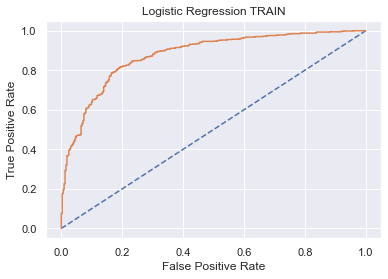

In [72]:
# predict probabilities
probs = logreg_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression TRAIN')
plt.show()

### Testing Data

In [73]:
# Accuracy - Test Data
logreg_test_acc=logreg_model.score(X_test, y_test)
logreg_test_acc

0.8493449781659389

In [74]:
confusion_matrix(y_test, ytest_predict_lr)

array([[ 94,  45],
       [ 24, 295]], dtype=int64)

### Classification report Train-Test

In [75]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict_lr),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict_lr),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       323
         1.0       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       139
         1.0       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458
 



AUC: 0.877
AUC: 0.914


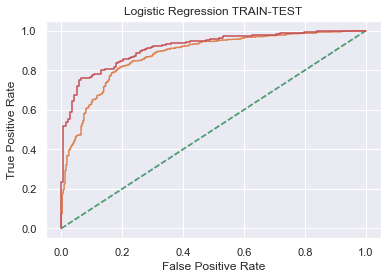

In [76]:
# AUC-ROC Train-Test

# predict probabilities
probs = logreg_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# predict probabilities
probs = logreg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression TRAIN-TEST')
plt.show()

In [77]:
logreg_metrics=classification_report(y_train, ytrain_predict_lr,output_dict=True)
dflr=pd.DataFrame(logreg_metrics).transpose()
logreg_train_precision=round(dflr.loc["1.0"][0],2)
logreg_train_recall=round(dflr.loc["1.0"][1],2)
logreg_train_f1=round(dflr.loc["1.0"][2],2)
logreg_train_acc=round(dflr.iloc[2,1],2)
print ('logreg_train_precision ',logreg_train_precision)
print ('logreg_train_recall ',logreg_train_recall)
print ('logreg_train_f1 ',logreg_train_f1)
print ('logreg_train_acc ',logreg_train_acc)

logreg_train_precision  0.86
logreg_train_recall  0.91
logreg_train_f1  0.88
logreg_train_acc  0.83


In [78]:
logreg_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
dflr=pd.DataFrame(logreg_metrics).transpose()
logreg_test_precision=round(dflr.loc["1.0"][0],2)
logreg_test_recall=round(dflr.loc["1.0"][1],2)
logreg_test_f1=round(dflr.loc["1.0"][2],2)
logreg_test_acc=round(dflr.iloc[2,1],2)
print ('logreg_test_precision ',logreg_test_precision)
print ('logreg_test_recall ',logreg_test_recall)
print ('logreg_test_f1 ',logreg_test_f1)
print ('logreg_test_acc ',logreg_test_acc)

logreg_test_precision  0.87
logreg_test_recall  0.92
logreg_test_f1  0.9
logreg_test_acc  0.85


## LDA Model

* Using unscaled data for LDA model

In [79]:
# separating the data into dependent and independent variable  
X=df.drop('vote',axis=1) 
y=df['vote']

In [80]:
from sklearn.model_selection import train_test_split
# splitting the dataset into 70:30 ratio
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()

In [82]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train1,y_train1)

In [83]:
lda_model.coef_

array([[-0.02320825,  0.35587037,  0.09539327,  0.64617407, -0.96982202,
        -0.22911747, -0.4531115 ,  0.15711823]])

In [84]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(lda_model.coef_[0][idx],2)))
    

The coefficient for age is -0.02
The coefficient for economic.cond.national is 0.36
The coefficient for economic.cond.household is 0.1
The coefficient for Blair is 0.65
The coefficient for Hague is -0.97
The coefficient for Europe is -0.23
The coefficient for political.knowledge is -0.45
The coefficient for gender is 0.16


In [85]:
coefficient_lda=[]
for idx, col_name in enumerate(X_train1.columns):
    data=(col_name, np.round(lda_model.coef_[0][idx],2))
    coefficient_lda.append(data)

In [86]:
coef_table_lda=pd.DataFrame(data=coefficient_lda,columns=['Variable','Coefficient'])
coef_table_lda

,Variable,Coefficient
0,age,-0.02
1,economic.cond.national,0.36
2,economic.cond.household,0.10
3,Blair,0.65
4,Hague,-0.97
5,Europe,-0.23
6,political.knowledge,-0.45
7,gender,0.16


In [87]:
# Let us check the intercept for the model

intercept = np.round(lda_model.intercept_[0],2)

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.89


In [88]:
intr=('intercept',3.89)
coefficient_lda.insert(0,intr)
coefficient_lda

[('intercept', 3.89),
 ('age', -0.02),
 ('economic.cond.national', 0.36),
 ('economic.cond.household', 0.1),
 ('Blair', 0.65),
 ('Hague', -0.97),
 ('Europe', -0.23),
 ('political.knowledge', -0.45),
 ('gender', 0.16)]

In [89]:
for i,j in np.array(coefficient_lda):
    print('({}) * {} +'.format(j,i),end=' ')

(3.89) * intercept + (-0.02) * age + (0.36) * economic.cond.national + (0.1) * economic.cond.household + (0.65) * Blair + (-0.97) * Hague + (-0.23) * Europe + (-0.45) * political.knowledge + (0.16) * gender + 

### Prediction

In [90]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = lda_model.predict(X_train1)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = lda_model.predict(X_test1)

### Training Data and Test Data Classification Report Comparison

In [91]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train1,pred_class_train_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test1,pred_class_test_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



### Probability prediction for the training and test data

In [92]:
# Training Data Probability Prediction
pred_prob_train_lda = lda_model.predict_proba(X_train1)

# Test Data Probability Prediction
pred_prob_test_lda = lda_model.predict_proba(X_test1)

In [93]:
pd.DataFrame(pred_prob_train_lda[:,1]).tail()

,0
1062,0.722553
1063,0.423381
1064,0.930132
1065,0.769262
1066,0.788668


AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


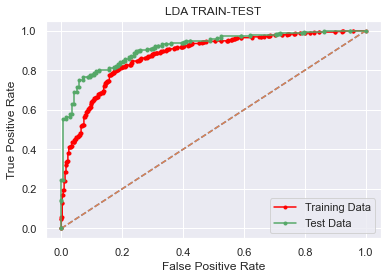

In [94]:
# AUC and ROC for the training data

# calculate AUC
LDA_default_train_auc = metrics.roc_auc_score(y_train1,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % LDA_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train1,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
LDA_default_test_auc = metrics.roc_auc_score(y_test1,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % LDA_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA TRAIN-TEST')
plt.show()

In [95]:
LDA_default_metrics=classification_report(y_train1,pred_class_train_lda,output_dict=True)
dflda=pd.DataFrame(LDA_default_metrics).transpose()
LDA_default_train_precision=round(dflda.loc["1"][0],2)
LDA_default_train_recall=round(dflda.loc["1"][1],2)
LDA_default_train_f1=round(dflda.loc["1"][2],2)
LDA_default_train_acc=round(dflda.iloc[2,1],2)
print ('LDA_default_train_precision ',LDA_default_train_precision)
print ('LDA_default_train_recall ',LDA_default_train_recall)
print ('LDA_default_train_f1 ',LDA_default_train_f1)
print ('LDA_default_train_acc ',LDA_default_train_acc)

LDA_default_train_precision  0.86
LDA_default_train_recall  0.9
LDA_default_train_f1  0.88
LDA_default_train_acc  0.83


In [96]:
LDA_default_metrics=classification_report(y_test1,pred_class_test_lda,output_dict=True)
dflda=pd.DataFrame(LDA_default_metrics).transpose()
LDA_default_test_precision=round(dflda.loc["1"][0],2)
LDA_default_test_recall=round(dflda.loc["1"][1],2)
LDA_default_test_f1=round(dflda.loc["1"][2],2)
LDA_default_test_acc=round(dflda.iloc[2,1],2)
print ('LDA_default_test_precision ',LDA_default_test_precision)
print ('LDA_default_test_recall ',LDA_default_test_recall)
print ('LDA_default_test_f1 ',LDA_default_test_f1)
print ('LDA_default_test_acc ',LDA_default_test_acc)

LDA_default_test_precision  0.87
LDA_default_test_recall  0.91
LDA_default_test_f1  0.89
LDA_default_test_acc  0.84


# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

## KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Prediction

In [98]:
y_train_predict_knn =KNN_model.predict(X_train)
y_test_predict_knn = KNN_model.predict(X_test)

In [99]:
## Performance Matrix on train data set

model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_knn))

0.8669165885660731
[[238  85]
 [ 57 687]]


In [100]:
## Performance Matrix on test data set

model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_knn))

0.8471615720524017
[[101  38]
 [ 32 287]]


## Classification report Train-Test

In [101]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_knn),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_knn),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       323
         1.0       0.89      0.92      0.91       744

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.87      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



### Probability prediction for the training and test data

In [102]:
# Training Data Probability Prediction
pred_prob_train_knn = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_knn = KNN_model.predict_proba(X_test)


In [103]:
pd.DataFrame(pred_prob_train_knn[:,1]).tail()

,0
1062,0.6
1063,0.0
1064,0.6
1065,1.0
1066,0.8


### # AUC and ROC

AUC for the Training Data: 0.933
AUC for the Test Data: 0.871


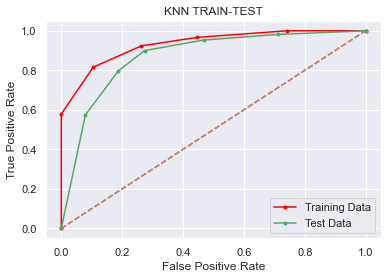

In [104]:
# AUC and ROC for the training data

# calculate AUC
KNN_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_knn[:,1])
print('AUC for the Training Data: %.3f' % KNN_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_knn[:,1])
print('AUC for the Test Data: %.3f' % KNN_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN TRAIN-TEST')
plt.show()

In [105]:
KNN_default_metrics=classification_report(y_train,y_train_predict_knn,output_dict=True)
dfknn=pd.DataFrame(KNN_default_metrics).transpose()
KNN_default_train_precision=round(dfknn.loc["1.0"][0],2)
KNN_default_train_recall=round(dfknn.loc["1.0"][1],2)
KNN_default_train_f1=round(dfknn.loc["1.0"][2],2)
KNN_default_train_acc=round(dfknn.iloc[2,1],2)
print ('KNN_default_train_precision ',KNN_default_train_precision)
print ('KNN_default_train_recall ',KNN_default_train_recall)
print ('KNN_default_train_f1 ',KNN_default_train_f1)
print ('KNN_default_train_acc ',KNN_default_train_acc)

KNN_default_train_precision  0.89
KNN_default_train_recall  0.92
KNN_default_train_f1  0.91
KNN_default_train_acc  0.87


In [106]:
KNN_default_metrics=classification_report(y_test,y_test_predict_knn,output_dict=True)
dfknn=pd.DataFrame(KNN_default_metrics).transpose()
KNN_default_test_precision=round(dfknn.loc["1.0"][0],2)
KNN_default_test_recall=round(dfknn.loc["1.0"][1],2)
KNN_default_test_f1=round(dfknn.loc["1.0"][2],2)
KNN_default_test_acc=round(dfknn.iloc[2,1],2)
print ('KNN_default_test_precision ',KNN_default_test_precision)
print ('KNN_default_test_recall ',KNN_default_test_recall)
print ('KNN_default_test_f1 ',KNN_default_test_f1)
print ('KNN_default_test_acc ',KNN_default_test_acc)

KNN_default_test_precision  0.88
KNN_default_test_recall  0.9
KNN_default_test_f1  0.89
KNN_default_test_acc  0.85


## Gaussian Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [108]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [109]:
## Performance Matrix on train data set
y_train_predict_NB = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict_NB)) 

0.8219306466729147
[[223 100]
 [ 90 654]]
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       323
         1.0       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [110]:
## Performance Matrix on test data set
y_test_predict_NB = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_NB))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict_NB))    ## classification_report

0.8471615720524017
[[101  38]
 [ 32 287]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



## Classification report Train-Test

In [111]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_NB),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_NB),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       323
         1.0       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



### Probability prediction for the training and test data

In [112]:
# Training Data Probability Prediction
pred_prob_train_NB = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_NB = NB_model.predict_proba(X_test)

In [113]:
pd.DataFrame(pred_prob_train_NB[:,1]).tail()

,0
1062,0.842155
1063,0.434889
1064,0.965420
1065,0.924846
1066,0.833981


### AUC and ROC

AUC for the Training Data: 0.874
AUC for the Test Data: 0.910


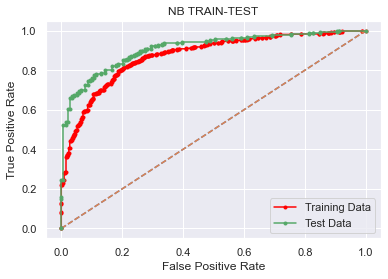

In [114]:
# AUC and ROC for the training data

# calculate AUC
NB_default_train_auc = metrics.roc_auc_score(y_train1,pred_prob_train_NB[:,1])
print('AUC for the Training Data: %.3f' % NB_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
NB_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_NB[:,1])
print('AUC for the Test Data: %.3f' % NB_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB TRAIN-TEST')
plt.show()

In [115]:
NB_default_metrics=classification_report(y_train,y_train_predict_NB,output_dict=True)
dfnb=pd.DataFrame(NB_default_metrics).transpose()
NB_default_train_precision=round(dfnb.loc["1.0"][0],2)
NB_default_train_recall=round(dfnb.loc["1.0"][1],2)
NB_default_train_f1=round(dfnb.loc["1.0"][2],2)
NB_default_train_acc=round(dfnb.iloc[2,1],2)
print ('NB_default_train_precision ',NB_default_train_precision)
print ('NB_default_train_recall ',NB_default_train_recall)
print ('NB_default_train_f1 ',NB_default_train_f1)
print ('NB_default_train_acc ',NB_default_train_acc)

NB_default_train_precision  0.87
NB_default_train_recall  0.88
NB_default_train_f1  0.87
NB_default_train_acc  0.82


In [116]:
NB_default_metrics=classification_report(y_test,y_test_predict_NB,output_dict=True)
dfnb=pd.DataFrame(NB_default_metrics).transpose()
NB_default_test_precision=round(dfnb.loc["1.0"][0],2)
NB_default_test_recall=round(dfnb.loc["1.0"][1],2)
NB_default_test_f1=round(dfnb.loc["1.0"][2],2)
NB_default_test_acc=round(dfnb.iloc[2,1],2)
print ('NB_default_test_precision ',NB_default_test_precision)
print ('NB_default_test_recall ',NB_default_test_recall)
print ('NB_default_test_f1 ',NB_default_test_f1)
print ('NB_default_test_acc ',NB_default_test_acc)

NB_default_test_precision  0.88
NB_default_test_recall  0.9
NB_default_test_f1  0.89
NB_default_test_acc  0.85


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

## Applying GridSearchCV for Logistic Regression

In [117]:
grid={'penalty':['l1','l2','none'],
      'solver':['sag','lbfgs','liblinear','saga'],
      'tol':[0.001,0.0001,0.00001]}

In [118]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [119]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [120]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.001)


In [121]:
best_model = grid_search.best_estimator_

In [122]:
best_model.coef_

array([[-1.07371501,  1.3563637 ,  0.32014573,  2.10216218, -3.25032696,
        -1.93527761, -0.99081897,  0.17230095]])

In [123]:
# Prediction on the training set

ytrain_predict_gs_lr = best_model.predict(X_train)
ytest_predict_gs_lr = best_model.predict(X_test)

In [124]:
## Getting the probabilities on the test set

ytest_predict_prob_gs_lr=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_gs_lr).head()

,0,1
0,0.246983,0.753017
1,0.090514,0.909486
2,0.061406,0.938594
3,0.260989,0.739011
4,0.020712,0.979288


              precision    recall  f1-score   support

         0.0       0.75      0.65      0.69       323
         1.0       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 



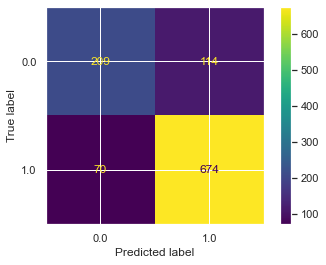

In [125]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict_gs_lr),'\n');

              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       139
         1.0       0.86      0.93      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.81       458
weighted avg       0.85      0.85      0.84       458
 



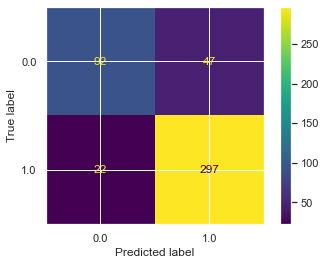

In [126]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict_gs_lr),'\n');

In [127]:
print('Classification Report log-reg before Grid search :\n\n',metrics.classification_report(y_test, ytest_predict_lr),'\n\n\n')
print('Classification Report log-reg after Grid search:\n\n',metrics.classification_report(y_test,ytest_predict_gs_lr),'\n')

Classification Report log-reg before Grid search :

               precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       139
         1.0       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458
 



Classification Report log-reg after Grid search:

               precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       139
         1.0       0.86      0.93      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.81       458
weighted avg       0.85      0.85      0.84       458
 



AUC: 0.877
AUC: 0.914


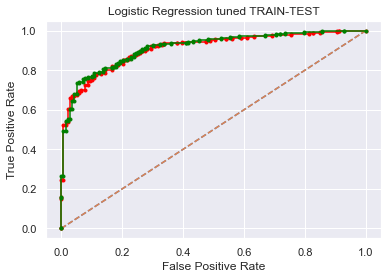

In [128]:
# AUC-ROC Train-Test

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_tuned_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_tuned_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--',label='test data')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label = 'Testing Data',color='green');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned TRAIN-TEST')
plt.show()

In [129]:
logreg_metrics=classification_report(y_train, ytrain_predict_gs_lr ,output_dict=True)
dflr=pd.DataFrame(logreg_metrics).transpose()
logreg_tuned_train_precision=round(dflr.loc["1.0"][0],2)
logreg_tuned_train_recall=round(dflr.loc["1.0"][1],2)
logreg_tuned_train_f1=round(dflr.loc["1.0"][2],2)
logreg_tuned_train_acc=round(dflr.iloc[2,1],2)
print ('logreg_tuned_train_precision ',logreg_tuned_train_precision)
print ('logreg_tuned_train_recall ',logreg_tuned_train_recall)
print ('logreg_tuned_train_f1 ',logreg_tuned_train_f1)
print ('logreg_tuned_train_acc ',logreg_tuned_train_acc)

logreg_tuned_train_precision  0.86
logreg_tuned_train_recall  0.91
logreg_tuned_train_f1  0.88
logreg_tuned_train_acc  0.83


In [130]:
logreg_metrics=classification_report(y_test, ytest_predict_gs_lr ,output_dict=True)
dflr=pd.DataFrame(logreg_metrics).transpose()
logreg_tuned_test_precision=round(dflr.loc["1.0"][0],2)
logreg_tuned_test_recall=round(dflr.loc["1.0"][1],2)
logreg_tuned_test_f1=round(dflr.loc["1.0"][2],2)
logreg_tuned_test_acc=round(dflr.iloc[2,1],2)
print ('logreg_tuned_test_precision ',logreg_tuned_test_precision)
print ('logreg_tuned_test_recall ',logreg_tuned_test_recall)
print ('logreg_tuned_test_f1 ',logreg_tuned_test_f1)
print ('logreg_tuned_test_acc ',logreg_tuned_test_acc)

logreg_tuned_test_precision  0.86
logreg_tuned_test_recall  0.93
logreg_tuned_test_f1  0.9
logreg_tuned_test_acc  0.85


### CV Score 


{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.001)

In [131]:
from sklearn.model_selection import cross_val_score
clfCVlogreg = LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.001)
scores = cross_val_score(clfCVlogreg, X_train, y_train, cv=10)
np.mean(scores)*100

82.29324634103334

### MODEL TUNING LDA

* An important hyperparameter is the solver, which defaults to ‘svd‘ but can also be set to other values for solvers that support the shrinkage capability.

* Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model
(Regularization reduces the variance associated with the sample based estimate at the expense of potentially increased bias)

* This can be set via the “shrinkage” argument and can be set to a value between 0 and 1. We will test values on a grid with a spacing of 0.01.

In [132]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()

In [134]:
from sklearn.model_selection import GridSearchCV
grid_search_lda = GridSearchCV(estimator = lda, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')
grid_search_lda.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='f1')

In [135]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'shrinkage': 0.03, 'solver': 'lsqr'} 

LinearDiscriminantAnalysis(shrinkage=0.03, solver='lsqr')


In [136]:
best_model_lda = grid_search_lda.best_estimator_

In [137]:
best_model_lda.coef_

array([[-0.01989957,  0.20398037,  0.1036944 ,  0.38866019, -0.54463562,
        -0.23263606, -0.21658821,  0.0287407 ]])

In [138]:
# Prediction on the training and test set

ytrain_predict_gs_lda = best_model_lda.predict(X_train)
ytest_predict_gs_lda = best_model_lda.predict(X_test)

In [139]:
## Getting the probabilities on the test set

ytest_predict_prob_gs_lda=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_gs_lda).head()

,0,1
0,0.035733,0.964267
1,0.027331,0.972669
2,0.027682,0.972318
3,0.038232,0.961768
4,0.022723,0.977277


In [140]:
print(metrics.confusion_matrix(y_train, ytrain_predict_gs_lda),'\n')
print(classification_report(y_train, ytrain_predict_gs_lda))

[[  0 323]
 [  0 744]] 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       323
         1.0       0.70      1.00      0.82       744

    accuracy                           0.70      1067
   macro avg       0.35      0.50      0.41      1067
weighted avg       0.49      0.70      0.57      1067



In [141]:
print(metrics.confusion_matrix(y_test, ytest_predict_gs_lda),'\n')
print(classification_report(y_test, ytest_predict_gs_lda))

[[  0 139]
 [  0 319]] 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       139
         1.0       0.70      1.00      0.82       319

    accuracy                           0.70       458
   macro avg       0.35      0.50      0.41       458
weighted avg       0.49      0.70      0.57       458



In [142]:
print('Classification Report of the LDA test data:\n\n',metrics.classification_report(y_test1,pred_class_test_lda),'\n')
print('Classification Report of the hypertuned testing data:\n\n',classification_report(y_test, ytest_predict_gs_lda))

Classification Report of the LDA test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 

Classification Report of the hypertuned testing data:

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       139
         1.0       0.70      1.00      0.82       319

    accuracy                           0.70       458
   macro avg       0.35      0.50      0.41       458
weighted avg       0.49      0.70      0.57       458



AUC: 0.877
AUC: 0.914


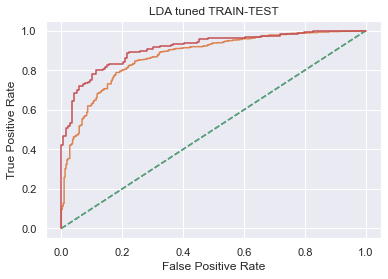

In [143]:
# AUC-ROC Train-Test

# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_tuned_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# predict probabilities
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_tuned_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA tuned TRAIN-TEST')
plt.show()

In [144]:
LDA_tuned_metrics=classification_report(y_train, ytrain_predict_gs_lda ,output_dict=True)
dflda=pd.DataFrame(LDA_tuned_metrics).transpose()
LDA_tuned_train_precision=round(dflda.loc["1.0"][0],2)
LDA_tuned_train_recall=round(dflda.loc["1.0"][1],2)
LDA_tuned_train_f1=round(dflda.loc["1.0"][2],2)
LDA_tuned_train_acc=round(dflda.iloc[2,1],2)
print ('LDA_tuned_train_precision ',LDA_tuned_train_precision)
print ('LDA_tuned_train_recall ',LDA_tuned_train_recall)
print ('LDA_tuned_train_f1 ',LDA_tuned_train_f1)
print ('LDA_tuned_train_acc ',LDA_tuned_train_acc)

LDA_tuned_train_precision  0.7
LDA_tuned_train_recall  1.0
LDA_tuned_train_f1  0.82
LDA_tuned_train_acc  0.7


In [145]:
LDA_tuned_metrics=classification_report(y_test, ytest_predict_gs_lda ,output_dict=True)
dflda=pd.DataFrame(LDA_tuned_metrics).transpose()
LDA_tuned_test_precision=round(dflda.loc["1.0"][0],2)
LDA_tuned_test_recall=round(dflda.loc["1.0"][1],2)
LDA_tuned_test_f1=round(dflda.loc["1.0"][2],2)
LDA_tuned_test_acc=round(dflda.iloc[2,1],2)
print ('LDA_tuned_test_precision ',LDA_tuned_test_precision)
print ('LDA_tuned_test_recall ',LDA_tuned_test_recall)
print ('LDA_tuned_test_f1 ',LDA_tuned_test_f1)
print ('LDA_tuned_test_acc ',LDA_tuned_test_acc)

LDA_tuned_test_precision  0.7
LDA_tuned_test_recall  1.0
LDA_tuned_test_f1  0.82
LDA_tuned_test_acc  0.7


**********************************************

## MODEL TUNING KNN

#### Running the KNN with no of neighbours to be 1,3,5..19 and *Finding the optimal number of neighbours from K=1,3,5,7....19 using the    Mis classification error

* Misclassification error (MCE) = 1 - Test accuracy score.
* We will Calculate MCE for each model with neighbours = 1,3,5...19 and Select the model with lowest MCE

In [146]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn2.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20960698689956336,
 0.16812227074235808,
 0.15283842794759828,
 0.15283842794759828,
 0.16375545851528384,
 0.14628820960698685,
 0.1353711790393013,
 0.14192139737991272,
 0.14628820960698685,
 0.15283842794759828]

### Plot of misclassification error vs k (with k value on X-axis) using matplotlib

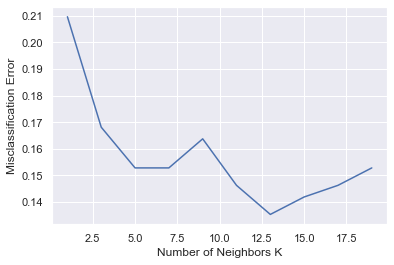

In [147]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

* For K = 13 it is giving the best test accuracy 

In [148]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model2=KNeighborsClassifier(n_neighbors=13)
KNN_model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [149]:
# Training Data Probability Prediction
pred_prob_train_knn2 = KNN_model2.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_knn2 = KNN_model2.predict_proba(X_test)


In [150]:
## Performance Matrix on train data set
y_train_predict_knn2 = KNN_model2.predict(X_train)
model_score = KNN_model2.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_knn2 ))

0.8341143392689785
[[219 104]
 [ 73 671]]


In [151]:
## Performance Matrix on test data set
y_test_predict_knn2  = KNN_model2.predict(X_test)
model_score = KNN_model2.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_knn2 ))

0.8646288209606987
[[100  39]
 [ 23 296]]


In [152]:
print('Classification Report tuned KNN train :\n\n',metrics.classification_report(y_train, y_train_predict_knn2 ),'\n\n\n')
print('Classification Report tuned KNN test:\n\n',metrics.classification_report(y_test,y_test_predict_knn2 ),'\n')

Classification Report tuned KNN train :

               precision    recall  f1-score   support

         0.0       0.75      0.68      0.71       323
         1.0       0.87      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 



Classification Report tuned KNN test:

               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       139
         1.0       0.88      0.93      0.91       319

    accuracy                           0.86       458
   macro avg       0.85      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458
 



In [153]:
print('Classification Report of KNN default model test data:\n\n',metrics.classification_report(y_test, y_test_predict_knn),'\n')
print('Classification Report tuned KNN model test:\n\n',metrics.classification_report(y_test,y_test_predict_knn2 ),'\n')

Classification Report of KNN default model test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 

Classification Report tuned KNN model test:

               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       139
         1.0       0.88      0.93      0.91       319

    accuracy                           0.86       458
   macro avg       0.85      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458
 



#### As the difference between train and test accuracies is less than 10%, it is a valid model

AUC for the Training Data: 0.908
AUC for the Test Data: 0.897


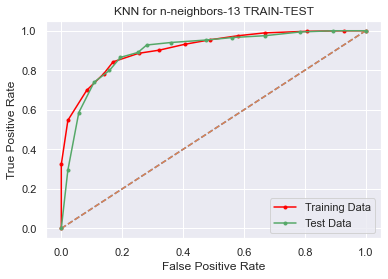

In [154]:
# AUC and ROC for the training data

# calculate AUC
KNN_tuned_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_knn2[:,1])
print('AUC for the Training Data: %.3f' % KNN_tuned_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_knn2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_tuned_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_knn2[:,1])
print('AUC for the Test Data: %.3f' % KNN_tuned_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_knn2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN for n-neighbors-13 TRAIN-TEST')
plt.show()

In [155]:
KNN_tuned_metrics=classification_report(y_train, y_train_predict_knn2,output_dict=True)
dfknn=pd.DataFrame(KNN_tuned_metrics).transpose()
KNN_tuned_train_precision=round(dfknn.loc["1.0"][0],2)
KNN_tuned_train_recall=round(dfknn.loc["1.0"][1],2)
KNN_tuned_train_f1=round(dfknn.loc["1.0"][2],2)
KNN_tuned_train_acc=round(dfknn.iloc[2,1],2)
print ('KNN_tuned_train_precision ',KNN_tuned_train_precision)
print ('KNN_tuned_train_recall ',KNN_tuned_train_recall)
print ('KNN_tuned_train_f1 ',KNN_tuned_train_f1)
print ('KNN_tuned_train_acc ',KNN_tuned_train_acc)

KNN_tuned_train_precision  0.87
KNN_tuned_train_recall  0.9
KNN_tuned_train_f1  0.88
KNN_tuned_train_acc  0.83


In [156]:
KNN_tuned_metrics=classification_report(y_test, y_test_predict_knn2,output_dict=True)
dfknn=pd.DataFrame(KNN_tuned_metrics).transpose()
KNN_tuned_test_precision=round(dfknn.loc["1.0"][0],2)
KNN_tuned_test_recall=round(dfknn.loc["1.0"][1],2)
KNN_tuned_test_f1=round(dfknn.loc["1.0"][2],2)
KNN_tuned_test_acc=round(dfknn.iloc[2,1],2)
print ('KNN_tuned_test_precision ',KNN_tuned_test_precision)
print ('KNN_tuned_test_recall ',KNN_tuned_test_recall)
print ('KNN_tuned_test_f1 ',KNN_tuned_test_f1)
print ('KNN_tuned_test_acc ',KNN_tuned_test_acc)

KNN_tuned_test_precision  0.88
KNN_tuned_test_recall  0.93
KNN_tuned_test_f1  0.91
KNN_tuned_test_acc  0.86


### CV score KNN

In [157]:
from sklearn.model_selection import cross_val_score
clfCVknn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(clfCVknn, X_train, y_train, cv=10)
cvs_knn=np.mean(scores)*100
cvs_knn=np.round(cvs_knn,2)
cvs_knn

81.91

******************************************************************************************************************************

# ADA BOOST

In [158]:
from sklearn.ensemble import AdaBoostClassifier

ADB = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [159]:
# Training Data Probability Prediction
pred_prob_train_adb = ADB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_adb = ADB.predict_proba(X_test)


In [160]:
## Performance Matrix on train data set 
y_train_pred_adb=ADB.predict(X_train)
model_scoreADB = ADB.score(X_train,y_train)
print(model_scoreADB)
print(metrics.confusion_matrix(y_train, y_train_pred_adb))

0.8444236176194939
[[227  96]
 [ 70 674]]


In [161]:
## Performance Matrix on test data set 
y_test_pred_adb=ADB.predict(X_test)
model_scoreADB =ADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_test_pred_adb))

0.8296943231441049
[[ 94  45]
 [ 33 286]]


In [162]:
print('Classification Report ADB train :\n\n',metrics.classification_report(y_train, y_train_pred_adb ),'\n\n\n')
print('Classification Report ADB test:\n\n',metrics.classification_report(y_test,y_test_pred_adb ),'\n')

Classification Report ADB train :

               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       323
         1.0       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



Classification Report ADB test:

               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       139
         1.0       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.899
AUC for the Test Data: 0.906


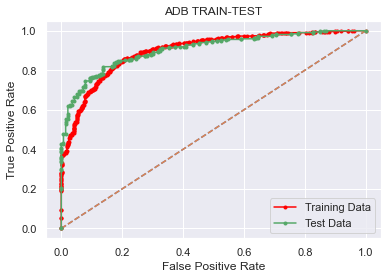

In [163]:
# AUC and ROC for the training data

# calculate AUC
ADB_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_adb[:,1])
print('AUC for the Training Data: %.3f' % ADB_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_adb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
ADB_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_adb[:,1])
print('AUC for the Test Data: %.3f' % ADB_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_adb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADB TRAIN-TEST')
plt.show()

In [164]:
var_imp_ADB=pd.DataFrame(ADB.feature_importances_, columns = ["Imp"], index = X_train.columns)
var_imp_ADB

,Imp
age,0.48
economic.cond.national,0.08
economic.cond.household,0.08
Blair,0.10
Hague,0.10
Europe,0.14
political.knowledge,0.02
gender,0.00


In [165]:
ADB_default_metrics=classification_report(y_train, y_train_pred_adb,output_dict=True)
dfadb=pd.DataFrame(ADB_default_metrics).transpose()
ADB_default_train_precision=round(dfadb.loc["1.0"][0],2)
ADB_default_train_recall=round(dfadb.loc["1.0"][1],2)
ADB_default_train_f1=round(dfadb.loc["1.0"][2],2)
ADB_default_train_acc=round(dfadb.iloc[2,1],2)
print ('ADB_default_train_precision ',ADB_default_train_precision)
print ('ADB_default_train_recall ',ADB_default_train_recall)
print ('ADB_default_train_f1 ',ADB_default_train_f1)
print ('ADB_default_train_acc ',ADB_default_train_acc)

ADB_default_train_precision  0.88
ADB_default_train_recall  0.91
ADB_default_train_f1  0.89
ADB_default_train_acc  0.84


In [166]:
ADB_default_metrics=classification_report(y_test, y_test_pred_adb,output_dict=True)
dfadb=pd.DataFrame(ADB_default_metrics).transpose()
ADB_default_test_precision=round(dfadb.loc["1.0"][0],2)
ADB_default_test_recall=round(dfadb.loc["1.0"][1],2)
ADB_default_test_f1=round(dfadb.loc["1.0"][2],2)
ADB_default_test_acc=round(dfadb.iloc[2,1],2)
print ('ADB_default_test_precision ',ADB_default_test_precision)
print ('ADB_default_test_recall ',ADB_default_test_recall)
print ('ADB_default_test_f1 ',ADB_default_test_f1)
print ('ADB_default_test_acc ',ADB_default_test_acc)

ADB_default_test_precision  0.86
ADB_default_test_recall  0.9
ADB_default_test_f1  0.88
ADB_default_test_acc  0.83


In [167]:
from sklearn.model_selection import cross_val_score 
clfCVadb = ADB
scores = cross_val_score(clfCVadb, X_train, y_train, cv=10)
cvs_ada=np.round(np.mean(scores)*100,2)
cvs_ada

81.45

**********************************************************************************************************************************

## Gradient Boosting

### Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [169]:
# Training Data Probability Prediction
pred_prob_train_gbcl = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_gbcl = gbcl.predict_proba(X_test)

In [170]:
## Performance Matrix on train data set
y_train_pred_gbcl=gbcl.predict(X_train)
model_scoregbcl = gbcl.score(X_train,y_train)
print(model_scoregbcl)
print(metrics.confusion_matrix(y_train, y_train_pred_gbcl))

0.887535145267104
[[246  77]
 [ 43 701]]


In [171]:
## Performance Matrix on test data set
y_test_pred_gbcl=gbcl.predict(X_test)
model_scoregbcl =gbcl.score(X_test, y_test)
print(model_scoregbcl)
print(metrics.confusion_matrix(y_test, y_test_pred_gbcl))

0.8384279475982532
[[ 92  47]
 [ 27 292]]


In [172]:
print('Classification Report GRB train :\n\n',metrics.classification_report(y_train, y_train_pred_gbcl ),'\n\n\n')
print('Classification Report GRB test:\n\n',metrics.classification_report(y_test,y_test_pred_gbcl ),'\n')

Classification Report GRB train :

               precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       323
         1.0       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067
 



Classification Report GRB test:

               precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       139
         1.0       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458
 



In [173]:
var_imp_GRB=pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
var_imp_GRB

,Imp
age,0.107206
economic.cond.national,0.045879
economic.cond.household,0.018766
Blair,0.168566
Hague,0.379666
Europe,0.153695
political.knowledge,0.122393
gender,0.003828


AUC for the Training Data: 0.948
AUC for the Test Data: 0.908


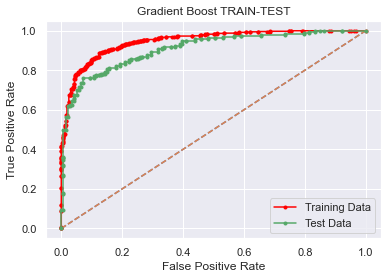

In [174]:
# AUC and ROC for the training data

# calculate AUC
GRB_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_gbcl[:,1])
print('AUC for the Training Data: %.3f' % GRB_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
GRB_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl[:,1])
print('AUC for the Test Data: %.3f' % GRB_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost TRAIN-TEST')
plt.show()

In [175]:
GRB_default_metrics=classification_report(y_train, y_train_pred_gbcl,output_dict=True)
dfGRB=pd.DataFrame(GRB_default_metrics).transpose()
GRB_default_train_precision=round(dfGRB.loc["1.0"][0],2)
GRB_default_train_recall=round(dfGRB.loc["1.0"][1],2)
GRB_default_train_f1=round(dfGRB.loc["1.0"][2],2)
GRB_default_train_acc=round(dfGRB.iloc[2,1],2)
print ('GRB_default_train_precision ',GRB_default_train_precision)
print ('GRB_default_train_recall ',GRB_default_train_recall)
print ('GRB_default_train_f1 ',GRB_default_train_f1)
print ('GRB_default_train_acc ',GRB_default_train_acc)

GRB_default_train_precision  0.9
GRB_default_train_recall  0.94
GRB_default_train_f1  0.92
GRB_default_train_acc  0.89


In [176]:
GRB_default_metrics=classification_report(y_test, y_test_pred_gbcl,output_dict=True)
dfGRB=pd.DataFrame(GRB_default_metrics).transpose()
GRB_default_test_precision=round(dfGRB.loc["1.0"][0],2)
GRB_default_test_recall=round(dfGRB.loc["1.0"][1],2)
GRB_default_test_f1=round(dfGRB.loc["1.0"][2],2)
GRB_default_test_acc=round(dfGRB.iloc[2,1],2)
print ('GRB_default_test_precision ',GRB_default_test_precision)
print ('GRB_default_test_recall ',GRB_default_test_recall)
print ('GRB_default_test_f1 ',GRB_default_test_f1)
print ('GRB_default_test_acc ',GRB_default_test_acc)

GRB_default_test_precision  0.86
GRB_default_test_recall  0.92
GRB_default_test_f1  0.89
GRB_default_test_acc  0.84


In [177]:
from sklearn.model_selection import cross_val_score
clfCVgbcl = gbcl
scores = cross_val_score(clfCVgbcl, X_train, y_train, cv=10)
cv_gb=np.round(np.mean(scores)*100,2)
cv_gb

82.95

### Random Forest

In [178]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RF Classifier
RF=RandomForestClassifier(random_state=1,oob_score=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [179]:
np.round(RF.oob_score_,3)

0.796

In [180]:
# Training Data Probability Prediction
pred_prob_train_RF = RF.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_RF = RF.predict_proba(X_test)

In [181]:
## Performance Matrix on train data set
y_train_pred_RF=RF.predict(X_train)
model_scoreRF = RF.score(X_train,y_train)
print(model_scoreRF)
print(metrics.confusion_matrix(y_train, y_train_pred_RF))

0.9990627928772259
[[322   1]
 [  0 744]]


In [182]:
## Performance Matrix on test data set
y_test_pred_RF=RF.predict(X_test)
model_scoreRF =RF.score(X_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_test_pred_RF))

0.8493449781659389
[[ 94  45]
 [ 24 295]]


In [183]:
print('Classification Report RF train :\n\n',metrics.classification_report(y_train, y_train_pred_RF ),'\n\n\n')
print('Classification Report RF test:\n\n',metrics.classification_report(y_test,y_test_pred_RF ),'\n')

Classification Report RF train :

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       323
         1.0       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 



Classification Report RF test:

               precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       139
         1.0       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458
 



In [184]:
var_imp_RF=pd.DataFrame(RF.feature_importances_, columns = ["Imp"], index = X_train.columns)
var_imp_RF

,Imp
age,0.221088
economic.cond.national,0.083894
economic.cond.household,0.078072
Blair,0.112469
Hague,0.190387
Europe,0.194575
political.knowledge,0.088094
gender,0.031420


AUC for the Training Data: 1.000
AUC for the Test Data: 0.913


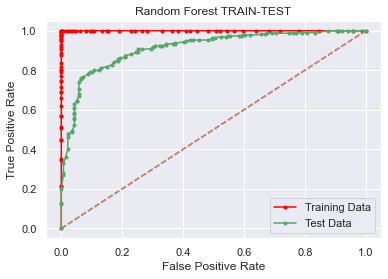

In [185]:
# AUC and ROC for the training data

# calculate AUC
RF_default_train_auc= metrics.roc_auc_score(y_train,pred_prob_train_RF[:,1])
print('AUC for the Training Data: %.3f' % RF_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the RF_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
RF_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_RF[:,1])
print('AUC for the Test Data: %.3f' % RF_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the RF_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest TRAIN-TEST')
plt.show()

In [186]:
RF_default_metrics=classification_report(y_train, y_train_pred_RF,output_dict=True)
dfRF=pd.DataFrame(RF_default_metrics).transpose()
RF_default_train_precision=round(dfRF.loc["1.0"][0],2)
RF_default_train_recall=round(dfRF.loc["1.0"][1],2)
RF_default_train_f1=round(dfRF.loc["1.0"][2],2)
RF_default_train_acc=round(dfRF.iloc[2,1],2)
print ('RF_default_train_precision ',RF_default_train_precision)
print ('RF_default_train_recall ',RF_default_train_recall)
print ('RF_default_train_f1 ',RF_default_train_f1)
print ('RF_default_train_acc ',RF_default_train_acc)

RF_default_train_precision  1.0
RF_default_train_recall  1.0
RF_default_train_f1  1.0
RF_default_train_acc  1.0


In [187]:
RF_default_metrics=classification_report(y_test, y_test_pred_RF,output_dict=True)
dfRF=pd.DataFrame(RF_default_metrics).transpose()
RF_default_test_precision=round(dfRF.loc["1.0"][0],2)
RF_default_test_recall=round(dfRF.loc["1.0"][1],2)
RF_default_test_f1=round(dfRF.loc["1.0"][2],2)
RF_default_test_acc=round(dfRF.iloc[2,1],2)
print ('RF_default_test_precision ',RF_default_test_precision)
print ('RF_default_test_recall ',RF_default_test_recall)
print ('RF_default_test_f1 ',RF_default_test_f1)
print ('RF_default_test_acc ',RF_default_test_acc)

RF_default_test_precision  0.87
RF_default_test_recall  0.92
RF_default_test_f1  0.9
RF_default_test_acc  0.85


In [188]:
from sklearn.model_selection import cross_val_score
clfCVRF = RF
scores = cross_val_score(clfCVRF, X_train, y_train, cv=10)
cv_rf=np.round(np.mean(scores)*100,2)
cv_rf

81.54

* The Random Forest model is overfitting

### Applying the Grid-Search-Cv to hypertune the Random Forest  Model

In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth': [7, 10],
    'max_features': [3,4,5],
    'min_samples_leaf': [11,22,33],
    'min_samples_split': [33,66,99],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 10)


In [190]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7, 10],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [11, 22, 33],
                         'min_samples_split': [33, 66, 99],
                         'n_estimators': [301, 501]})

In [191]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 33,
 'n_estimators': 501}

In [192]:
best_grid_RF = grid_search.best_estimator_

In [193]:
ytrain_predict_gsRF = best_grid_RF.predict(X_train)
ytest_predict_gsRF= best_grid_RF.predict(X_test)

In [194]:
# Training Data Probability Prediction
pred_prob_train_best_grid_RF = best_grid_RF.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_best_grid_RF = best_grid_RF.predict_proba(X_test)

In [195]:
## Performance Matrix on train data set
model_scoregsRF =best_grid_RF.score(X_train,y_train)
print(model_scoregsRF)
print(metrics.confusion_matrix(y_train,ytrain_predict_gsRF))
print(metrics.classification_report(y_train,ytrain_predict_gsRF))

0.8547328959700093
[[219 104]
 [ 51 693]]
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74       323
         1.0       0.87      0.93      0.90       744

    accuracy                           0.85      1067
   macro avg       0.84      0.80      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [196]:
## Performance Matrix on test data set
model_scoregsRF =best_grid_RF.score(X_test, y_test)
print(model_scoregsRF)
print(metrics.confusion_matrix(y_test, ytest_predict_gsRF))
print(metrics.classification_report(y_test, ytest_predict_gsRF))

0.8471615720524017
[[ 90  49]
 [ 21 298]]
              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       139
         1.0       0.86      0.93      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458



In [197]:
print('Classification Report GS-RF train :\n\n',metrics.classification_report(y_train, ytrain_predict_gsRF ),'\n\n\n')
print('Classification Report GS-RF test:\n\n',metrics.classification_report(y_test,ytest_predict_gsRF ),'\n')

Classification Report GS-RF train :

               precision    recall  f1-score   support

         0.0       0.81      0.68      0.74       323
         1.0       0.87      0.93      0.90       744

    accuracy                           0.85      1067
   macro avg       0.84      0.80      0.82      1067
weighted avg       0.85      0.85      0.85      1067
 



Classification Report GS-RF test:

               precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       139
         1.0       0.86      0.93      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458
 



AUC for the Training Data: 0.921
AUC for the Test Data: 0.913


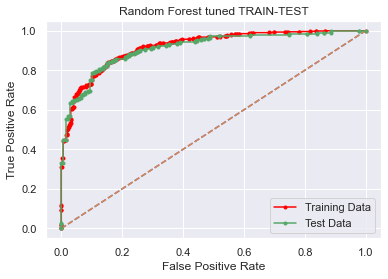

In [198]:
# AUC and ROC for the training data

# calculate AUC
gs_RF_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_best_grid_RF[:,1])
print('AUC for the Training Data: %.3f' % gs_RF_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_best_grid_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid_RF_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
gs_RF_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_best_grid_RF[:,1])
print('AUC for the Test Data: %.3f' % gs_RF_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_best_grid_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid_RF_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest tuned TRAIN-TEST')
plt.show()

In [199]:
gs_RF_default_metrics=classification_report(y_train, ytrain_predict_gsRF,output_dict=True)
dfgs_RF=pd.DataFrame(gs_RF_default_metrics).transpose()
gs_RF_default_train_precision=round(dfgs_RF.loc["1.0"][0],2)
gs_RF_default_train_recall=round(dfgs_RF.loc["1.0"][1],2)
gs_RF_default_train_f1=round(dfgs_RF.loc["1.0"][2],2)
gs_RF_default_train_acc=round(dfgs_RF.iloc[2,1],2)
print ('gs_RF_default_train_precision ',gs_RF_default_train_precision)
print ('gs_RF_default_train_recall ',gs_RF_default_train_recall)
print ('gs_RF_default_train_f1 ',gs_RF_default_train_f1)
print ('gs_RF_default_train_acc ',gs_RF_default_train_acc)

gs_RF_default_train_precision  0.87
gs_RF_default_train_recall  0.93
gs_RF_default_train_f1  0.9
gs_RF_default_train_acc  0.85


In [200]:
gs_RF_default_metrics=classification_report(y_test, ytest_predict_gsRF,output_dict=True)
dfgs_RF=pd.DataFrame(gs_RF_default_metrics).transpose()
gs_RF_default_test_precision=round(dfgs_RF.loc["1.0"][0],2)
gs_RF_default_test_recall=round(dfgs_RF.loc["1.0"][1],2)
gs_RF_default_test_f1=round(dfgs_RF.loc["1.0"][2],2)
gs_RF_default_test_acc=round(dfgs_RF.iloc[2,1],2)
print ('gs_RF_default_test_precision ',gs_RF_default_test_precision)
print ('gs_RF_default_test_recall ',gs_RF_default_test_recall)
print ('gs_RF_default_test_f1 ',gs_RF_default_test_f1)
print ('gs_RF_default_test_acc ',gs_RF_default_test_acc)

gs_RF_default_test_precision  0.86
gs_RF_default_test_recall  0.93
gs_RF_default_test_f1  0.89
gs_RF_default_test_acc  0.85


### CV Score

In [201]:
from sklearn.model_selection import cross_val_score
clfCVgsRF = RandomForestClassifier(max_depth=7,max_features=3,min_samples_split=33,
    min_samples_leaf=11,n_estimators=301)
scores = cross_val_score(clfCVgsRF, X_train, y_train, cv=10)
cv_gsrf=np.round(np.mean(scores)*100,2)
cv_gsrf

82.38

***************************************************************************************************************************************

# Bagging Classifier

* A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [202]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=best_grid_RF,random_state=1) 

bgcl = bgcl.fit(X_train, y_train)

In [203]:
# Training Data Probability Prediction
pred_prob_train_bgcl = bgcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_bgcl = bgcl.predict_proba(X_test)

In [204]:
ytrain_predict_bgcl = bgcl.predict(X_train)
ytest_predict_bgcl= bgcl.predict(X_test)

In [205]:
## Performance Matrix on train data set
model_score_bg =bgcl.score(X_train,y_train)
print(model_score_bg)
print(metrics.confusion_matrix(y_train,ytrain_predict_bgcl))

0.8425492033739457
[[209 114]
 [ 54 690]]


In [206]:
## Performance Matrix on test data set
model_score_bg =bgcl.score(X_test , y_test)
print(model_score_bg)
print(metrics.confusion_matrix(y_test,ytest_predict_bgcl))

0.8384279475982532
[[ 86  53]
 [ 21 298]]


In [207]:
print('Classification Report Bagging with RF train :\n\n',metrics.classification_report(y_train, ytrain_predict_bgcl ),'\n\n\n')
print('Classification Report Bagging with RF test:\n\n',metrics.classification_report(y_test,ytest_predict_bgcl ),'\n')

Classification Report Bagging with RF train :

               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       323
         1.0       0.86      0.93      0.89       744

    accuracy                           0.84      1067
   macro avg       0.83      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067
 



Classification Report Bagging with RF test:

               precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       139
         1.0       0.85      0.93      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.78      0.79       458
weighted avg       0.84      0.84      0.83       458
 



AUC for the Training Data: 0.906
AUC for the Test Data: 0.911


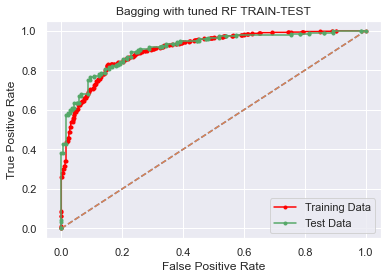

In [208]:
# AUC and ROC for the training data

# calculate AUC
Bagging_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_bgcl[:,1])
print('AUC for the Training Data: %.3f' % Bagging_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
Bagging_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_bgcl[:,1])
print('AUC for the Test Data: %.3f' % Bagging_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging with tuned RF TRAIN-TEST')
plt.show()

In [209]:
Bagging_default_metrics=classification_report(y_train, ytrain_predict_bgcl ,output_dict=True)
dfBagging=pd.DataFrame(Bagging_default_metrics).transpose()
Bagging_default_train_precision=round(dfBagging.loc["1.0"][0],2)
Bagging_default_train_recall=round(dfBagging.loc["1.0"][1],2)
Bagging_default_train_f1=round(dfBagging.loc["1.0"][2],2)
Bagging_default_train_acc=round(dfBagging.iloc[2,1],2)
print ('Bagging_default_train_precision ',Bagging_default_train_precision)
print ('Bagging_default_train_recall ',Bagging_default_train_recall)
print ('Bagging_default_train_f1 ',Bagging_default_train_f1)
print ('Bagging_default_train_acc ',Bagging_default_train_acc)

Bagging_default_train_precision  0.86
Bagging_default_train_recall  0.93
Bagging_default_train_f1  0.89
Bagging_default_train_acc  0.84


In [210]:
Bagging_default_metrics=classification_report(y_test,ytest_predict_bgcl,output_dict=True)
dfBagging=pd.DataFrame(Bagging_default_metrics).transpose()
Bagging_default_test_precision=round(dfBagging.loc["1.0"][0],2)
Bagging_default_test_recall=round(dfBagging.loc["1.0"][1],2)
Bagging_default_test_f1=round(dfBagging.loc["1.0"][2],2)
Bagging_default_test_acc=round(dfBagging.iloc[2,1],2)
print ('Bagging_default_test_precision ',Bagging_default_test_precision)
print ('Bagging_default_test_recall ',Bagging_default_test_recall)
print ('Bagging_default_test_f1 ',Bagging_default_test_f1)
print ('Bagging_default_test_acc ',Bagging_default_test_acc)

Bagging_default_test_precision  0.85
Bagging_default_test_recall  0.93
Bagging_default_test_f1  0.89
Bagging_default_test_acc  0.84


### CV Score

In [211]:
from sklearn.model_selection import cross_val_score
clfCVbgcl = bgcl
scores = cross_val_score(clfCVbgcl, X_train, y_train, cv=10)
cv_bgcl=np.round(np.mean(scores)*100,2)
cv_bgcl

82.01

*************************************************************************

# SMOTE

In [212]:
from imblearn.over_sampling import SMOTE

In [213]:
sm=SMOTE()
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [214]:
X_train_res.shape

(1488, 8)

In [215]:
y_train_res.shape

(1488,)

### Logistic Regression with SMOTE

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
# Fit the Logistic Regression model
logreg_SM = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logreg_SM.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [218]:
# Training Data Probability Prediction
pred_prob_train_logreg_SM = logreg_SM.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_logreg_SM = logreg_SM.predict_proba(X_test)

In [219]:
## Performance Matrix on train data set with SMOTE
y_train_predict_logreg_SM = logreg_SM.predict(X_train_res)
model_score = logreg_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_logreg_SM))

0.8064516129032258
[[594 150]
 [138 606]]


In [220]:
## Performance Matrix on test data set
y_test_predict_logreg_SM = logreg_SM.predict(X_test)
model_score = logreg_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_logreg_SM))

0.8296943231441049
[[114  25]
 [ 53 266]]


In [221]:
print('Classification Report Log-reg with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_logreg_SM),'\n\n\n')
print('Classification Report Log-reg with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_logreg_SM),'\n')

Classification Report Log-reg with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       744
         1.0       0.80      0.81      0.81       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488
 



Classification Report Log-reg with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.68      0.82      0.75       139
         1.0       0.91      0.83      0.87       319

    accuracy                           0.83       458
   macro avg       0.80      0.83      0.81       458
weighted avg       0.84      0.83      0.83       458
 



AUC for the Training Data: 0.879
AUC for the Test Data: 0.915


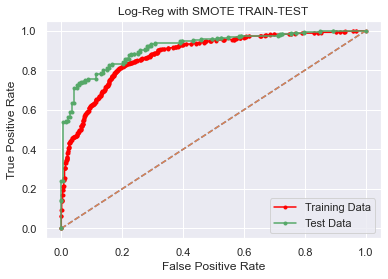

In [222]:
# AUC and ROC for the training data

# calculate AUC
logreg_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_logreg_SM[:,1])
print('AUC for the Training Data: %.3f' % logreg_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_logreg_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the logreg_SM_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
logreg_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_logreg_SM[:,1])
print('AUC for the Test Data: %.3f' % logreg_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_logreg_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the logreg_SM_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log-Reg with SMOTE TRAIN-TEST')
plt.show()

In [223]:
logreg_SM_metrics=classification_report(y_train_res, y_train_predict_logreg_SM ,output_dict=True)
dflogreg_SM=pd.DataFrame(logreg_SM_metrics).transpose()
logreg_SM_train_precision=round(dflogreg_SM.loc["1.0"][0],2)
logreg_SM_train_recall=round(dflogreg_SM.loc["1.0"][1],2)
logreg_SM_train_f1=round(dflogreg_SM.loc["1.0"][2],2)
logreg_SM_train_acc=round(dflogreg_SM.iloc[2,1],2)
print ('logreg_SM_train_precision ',logreg_SM_train_precision)
print ('logreg_SM_train_recall ',logreg_SM_train_recall)
print ('logreg_SM_train_f1 ',logreg_SM_train_f1)
print ('logreg_SM_train_acc ',logreg_SM_train_acc)

logreg_SM_train_precision  0.8
logreg_SM_train_recall  0.81
logreg_SM_train_f1  0.81
logreg_SM_train_acc  0.81


In [224]:
logreg_SM_metrics=classification_report(y_test, y_test_predict_logreg_SM ,output_dict=True)
dflogreg_SM=pd.DataFrame(logreg_SM_metrics).transpose()
logreg_SM_test_precision=round(dflogreg_SM.loc["1.0"][0],2)
logreg_SM_test_recall=round(dflogreg_SM.loc["1.0"][1],2)
logreg_SM_test_f1=round(dflogreg_SM.loc["1.0"][2],2)
logreg_SM_test_acc=round(dflogreg_SM.iloc[2,1],2)
print ('logreg_SM_test_precision ',logreg_SM_test_precision)
print ('logreg_SM_test_recall ',logreg_SM_test_recall)
print ('logreg_SM_test_f1 ',logreg_SM_test_f1)
print ('logreg_SM_test_acc ',logreg_SM_test_acc)

logreg_SM_test_precision  0.91
logreg_SM_test_recall  0.83
logreg_SM_test_f1  0.87
logreg_SM_test_acc  0.83


## LDA with SMOTE

In [225]:
#Build LDA Model
lda_SM = LinearDiscriminantAnalysis()
lda_SM.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [226]:
# Training Data Probability Prediction
pred_prob_train_lda_SM = lda_SM.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_lda_SM = lda_SM.predict_proba(X_test)

In [227]:
## Performance Matrix on train data set with SMOTE
y_train_predict_lda_SM = lda_SM.predict(X_train_res)
model_score = lda_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_lda_SM))

0.8071236559139785
[[597 147]
 [140 604]]


In [228]:
## Performance Matrix on test data set
y_test_predict_lda_SM = lda_SM.predict(X_test)
model_score = lda_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda_SM))

0.8209606986899564
[[113  26]
 [ 56 263]]


In [229]:
print('Classification Report LDA with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_lda_SM),'\n')
print('Classification Report LDA with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_lda_SM),'\n')

Classification Report LDA with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       744
         1.0       0.80      0.81      0.81       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488
 

Classification Report LDA with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 



AUC for the Training Data: 0.879
AUC for the Test Data: 0.913


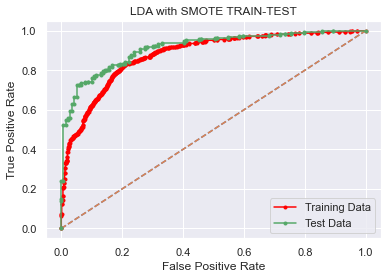

In [230]:
# AUC and ROC for the training data

# calculate AUC
lda_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_lda_SM[:,1])
print('AUC for the Training Data: %.3f' % lda_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_lda_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
lda_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_lda_SM[:,1])
print('AUC for the Test Data: %.3f' % lda_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA with SMOTE TRAIN-TEST')
plt.show()

In [231]:
lda_SM_metrics=classification_report(y_train_res, y_train_predict_lda_SM ,output_dict=True)
dflda_SM=pd.DataFrame(lda_SM_metrics).transpose()
lda_SM_train_precision=round(dflda_SM.loc["1.0"][0],2)
lda_SM_train_recall=round(dflda_SM.loc["1.0"][1],2)
lda_SM_train_f1=round(dflda_SM.loc["1.0"][2],2)
lda_SM_train_acc=round(dflda_SM.iloc[2,1],2)
print ('lda_SM_train_precision ',lda_SM_train_precision)
print ('lda_SM_train_recall ',lda_SM_train_recall)
print ('lda_SM_train_f1 ',lda_SM_train_f1)
print ('lda_SM_train_acc ',lda_SM_train_acc)

lda_SM_train_precision  0.8
lda_SM_train_recall  0.81
lda_SM_train_f1  0.81
lda_SM_train_acc  0.81


In [232]:
lda_SM_metrics=classification_report(y_test, y_test_predict_lda_SM ,output_dict=True)
dflda_SM=pd.DataFrame(lda_SM_metrics).transpose()
lda_SM_test_precision=round(dflda_SM.loc["1.0"][0],2)
lda_SM_test_recall=round(dflda_SM.loc["1.0"][1],2)
lda_SM_test_f1=round(dflda_SM.loc["1.0"][2],2)
lda_SM_test_acc=round(dflda_SM.iloc[2,1],2)
print ('lda_SM_test_precision ',lda_SM_test_precision)
print ('lda_SM_test_recall ',lda_SM_test_recall)
print ('lda_SM_test_f1 ',lda_SM_test_f1)
print ('lda_SM_test_acc ',lda_SM_test_acc)

lda_SM_test_precision  0.91
lda_SM_test_recall  0.82
lda_SM_test_f1  0.87
lda_SM_test_acc  0.82


### Changing the cut-off values for maximum accuracy of base LDA model

********************************************************

In [233]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),2))
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),2))
    print('Precision Score',round(metrics.precision_score(y_train,custom_cutoff_data),2))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),2),'\n')


0.1 

Accuracy Score 0.75
Recall Score 0.99
Precision Score 0.74
F1 Score 0.84 

0.2 

Accuracy Score 0.79
Recall Score 0.97
Precision Score 0.78
F1 Score 0.86 

0.3 

Accuracy Score 0.81
Recall Score 0.95
Precision Score 0.81
F1 Score 0.87 

0.4 

Accuracy Score 0.82
Recall Score 0.93
Precision Score 0.84
F1 Score 0.88 

0.5 

Accuracy Score 0.83
Recall Score 0.9
Precision Score 0.86
F1 Score 0.88 

0.6 

Accuracy Score 0.82
Recall Score 0.86
Precision Score 0.88
F1 Score 0.87 

0.7 

Accuracy Score 0.81
Recall Score 0.81
Precision Score 0.91
F1 Score 0.86 

0.8 

Accuracy Score 0.76
Recall Score 0.71
Precision Score 0.92
F1 Score 0.8 

0.9 

Accuracy Score 0.67
Recall Score 0.56
Precision Score 0.95
F1 Score 0.71 



In [234]:
# selecting the cutoff value which gives us the maximum accuracy 

In [235]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test_lda[:,1])):
    if np.array(pred_prob_test_lda[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [236]:
print('Classification Report of the LDA with SMOTE Test data:\n\n',metrics.classification_report(y_test, y_test_predict_lda_SM),'\n\n')
print('Classification Report of the Custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the LDA with SMOTE Test data:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 


Classification Report of the Custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       139
         1.0       0.86      0.94      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458
 



In [237]:
print('Confusion Matrix LDA with SMOTE Custom Cutoff\n',metrics.confusion_matrix(y_test,data_pred_custom_cutoff))

Confusion Matrix LDA with SMOTE Custom Cutoff
 [[ 89  50]
 [ 20 299]]


In [238]:
Optimal_Threshold_point=np.round(thresholds[np.argmin(abs(tpr-(1-fpr)))],2)
print('Optimal_Threshold_point',Optimal_Threshold_point)

Optimal_Threshold_point 0.51


In [239]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
44,0.165468,0.824451,0.834532,-0.010081,0.514697


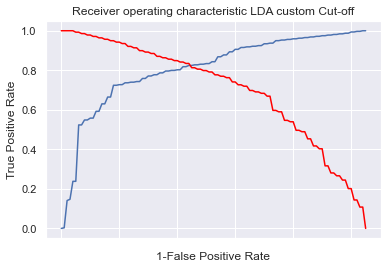

In [240]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic LDA custom Cut-off')
ax.set_xticklabels([])
plt.show();

In [241]:
y_predsm_cc = (lda_SM.predict_proba(X_test)[:,1] >= 0.4).astype(bool)

AUC for the Test Data: 0.819


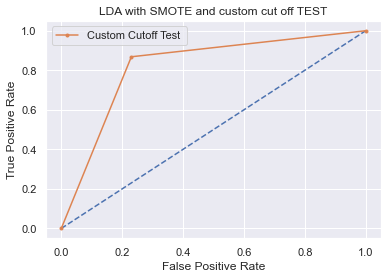

In [242]:
# calculate AUC
lda_SM_CC_test_auc = metrics.roc_auc_score(y_test,y_predsm_cc)
print('AUC for the Test Data: %.3f' % lda_SM_CC_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predsm_cc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label='Custom Cutoff Test ')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA with SMOTE and custom cut off TEST')
plt.show()

In [243]:
lda_SM_CC_metrics=classification_report(y_test,data_pred_custom_cutoff ,output_dict=True)
dflda_SM_CC=pd.DataFrame(lda_SM_CC_metrics).transpose()
lda_SM_CC_test_precision=round(dflda_SM_CC.loc["1.0"][0],2)
lda_SM_CC_test_recall=round(dflda_SM_CC.loc["1.0"][1],2)
lda_SM_CC_test_f1=round(dflda_SM_CC.loc["1.0"][2],2)
lda_SM_CC_test_acc=round(dflda_SM_CC.iloc[2,1],2)
print ('lda_SM_CC_test_precision ',lda_SM_CC_test_precision)
print ('lda_SM_CC_test_recall ',lda_SM_CC_test_recall)
print ('lda_SM_CC_test_f1 ',lda_SM_CC_test_f1)
print ('lda_SM_CC_test_acc ',lda_SM_CC_test_acc)

lda_SM_CC_test_precision  0.86
lda_SM_CC_test_recall  0.94
lda_SM_CC_test_f1  0.9
lda_SM_CC_test_acc  0.85


*********************************************************************************************************************************

### KNN With SMOTE

In [244]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier(n_neighbors=5)
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [245]:
# Training Data Probability Prediction
pred_prob_train_KNN_SM_model = KNN_SM_model.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_KNN_SM_model = KNN_SM_model.predict_proba(X_test)

In [246]:
## Performance Matrix on train data set
y_train_predict_KNN_SM= KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM))


0.8864247311827957
[[701  43]
 [126 618]]


In [247]:
## Performance Matrix on test data set
y_test_predict_KNN_SM = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN_SM))


0.8100436681222707
[[113  26]
 [ 61 258]]


In [248]:
print('Classification Report KNN with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_KNN_SM),'\n\n')
print('Classification Report KNN with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM),'\n')

Classification Report KNN with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       744
         1.0       0.93      0.83      0.88       744

    accuracy                           0.89      1488
   macro avg       0.89      0.89      0.89      1488
weighted avg       0.89      0.89      0.89      1488
 


Classification Report KNN with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       139
         1.0       0.91      0.81      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.81      0.82       458
 



AUC for the Training Data: 0.966
AUC for the Test Data: 0.868


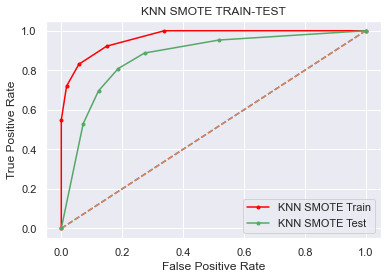

In [249]:
# AUC and ROC for the training data

# calculate AUC
KNN_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_KNN_SM_model[:,1])
print('AUC for the Training Data: %.3f' % KNN_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_KNN_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model_model
plt.plot(fpr, tpr, marker='.',label = 'KNN SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_KNN_SM_model[:,1])
print('AUC for the Test Data: %.3f' % KNN_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model_model
plt.plot(fpr, tpr, marker='.',label='KNN SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN SMOTE TRAIN-TEST')
plt.show()

In [250]:
KNN_SM_metrics=classification_report(y_train_res, y_train_predict_KNN_SM ,output_dict=True)
dfKNN_SM_=pd.DataFrame(KNN_SM_metrics).transpose()
KNN_SM_train_precision=round(dfKNN_SM_.loc["1.0"][0],2)
KNN_SM_train_recall=round(dfKNN_SM_.loc["1.0"][1],2)
KNN_SM_train_f1=round(dfKNN_SM_.loc["1.0"][2],2)
KNN_SM_train_acc=round(dfKNN_SM_.iloc[2,1],2)
print ('KNN_SM_train_precision ',KNN_SM_train_precision)
print ('KNN_SM_train_recall ',KNN_SM_train_recall)
print ('KNN_SM_train_f1 ',KNN_SM_train_f1)
print ('KNN_SM_train_acc ',KNN_SM_train_acc)

KNN_SM_train_precision  0.93
KNN_SM_train_recall  0.83
KNN_SM_train_f1  0.88
KNN_SM_train_acc  0.89


In [251]:
KNN_SM_metrics=classification_report(y_test, y_test_predict_KNN_SM ,output_dict=True)
dfKNN_SM_=pd.DataFrame(KNN_SM_metrics).transpose()
KNN_SM_test_precision=round(dfKNN_SM_.loc["1.0"][0],2)
KNN_SM_test_recall=round(dfKNN_SM_.loc["1.0"][1],2)
KNN_SM_test_f1=round(dfKNN_SM_.loc["1.0"][2],2)
KNN_SM_test_acc=round(dfKNN_SM_.iloc[2,1],2)
print ('KNN_SM_test_precision ',KNN_SM_test_precision)
print ('KNN_SM_test_recall ',KNN_SM_test_recall)
print ('KNN_SM_test_f1 ',KNN_SM_test_f1)
print ('KNN_SM_test_acc ',KNN_SM_test_acc)

KNN_SM_test_precision  0.91
KNN_SM_test_recall  0.81
KNN_SM_test_f1  0.86
KNN_SM_test_acc  0.81


* The KNN model with SMOTE has performed well on the train set with accuracy of 88.37% while on test set its performance has dropped to 80.56%

### KNN SMOTE + tuning

In [252]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN_SM_model=KNeighborsClassifier(n_neighbors=k)
    KNN_SM_model.fit(X_train_res,y_train_res)
    # evaluate test accuracy
    scores = KNN_SM_model.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20742358078602618,
 0.1986899563318777,
 0.1899563318777293,
 0.17903930131004364,
 0.17685589519650657,
 0.16812227074235808,
 0.18122270742358082,
 0.17685589519650657,
 0.18122270742358082,
 0.1746724890829694]

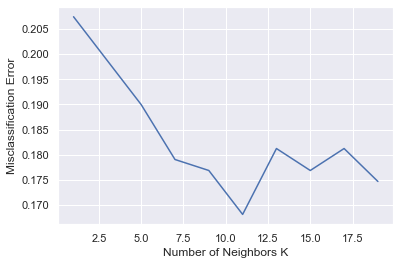

In [253]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

* After Tuning the KNN model with SMOTE we obtain the lowest Misclassification error for k=17
* Building a new KNN model for K=17 

In [254]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model17=KNeighborsClassifier(n_neighbors=17)
KNN_SM_model17.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=17)

In [255]:
# Training Data Probability Prediction
pred_prob_train_KNN_SM_model17 = KNN_SM_model17.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_KNN_SM_model17 = KNN_SM_model17.predict_proba(X_test)

In [256]:
## Performance Matrix on train data set
y_train_predict_KNN_SM17= KNN_SM_model17.predict(X_train_res)
model_score = KNN_SM_model17.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM17))

0.8481182795698925
[[663  81]
 [145 599]]


In [257]:
## Performance Matrix on test data set
y_test_predict_KNN_SM17 = KNN_SM_model17.predict(X_test)
model_score = KNN_SM_model17.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN_SM17))


0.8187772925764192
[[112  27]
 [ 56 263]]


In [258]:
print('Classification Report KNN with SMOTE tuned train:\n\n',metrics.classification_report(y_train_res, y_train_predict_KNN_SM17 ),'\n')
print('Classification Report KNN With SMOTE tuned test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM17 ),'\n')

Classification Report KNN with SMOTE tuned train:

               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       744
         1.0       0.88      0.81      0.84       744

    accuracy                           0.85      1488
   macro avg       0.85      0.85      0.85      1488
weighted avg       0.85      0.85      0.85      1488
 

Classification Report KNN With SMOTE tuned test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.86       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.83      0.82      0.82       458
 



In [259]:
print('Classification Report KNN with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM),'\n')
print('Classification Report KNN With SMOTE tuned test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM17 ),'\n')

Classification Report KNN with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       139
         1.0       0.91      0.81      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.81      0.82       458
 

Classification Report KNN With SMOTE tuned test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.86       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.83      0.82      0.82       458
 



AUC for the Training Data: 0.929
AUC for the Test Data: 0.894


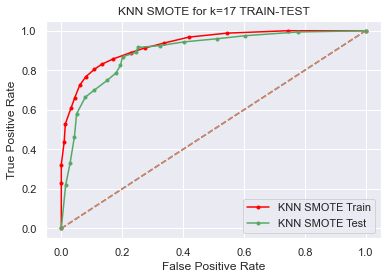

In [260]:
# AUC and ROC for the training data

# calculate AUC
KNN_SM17_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_KNN_SM_model17[:,1])
print('AUC for the Training Data: %.3f' % KNN_SM17_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_KNN_SM_model17[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model17_model17
plt.plot(fpr, tpr, marker='.',label = 'KNN SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_SM17_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_KNN_SM_model17[:,1])
print('AUC for the Test Data: %.3f' % KNN_SM17_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN_SM_model17[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model17_model17
plt.plot(fpr, tpr, marker='.',label='KNN SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN SMOTE for k=17 TRAIN-TEST')
plt.show()

In [261]:
KNN_SM17_metrics=classification_report(y_train_res, y_train_predict_KNN_SM17 ,output_dict=True)
dfKNN_SM17=pd.DataFrame(KNN_SM17_metrics).transpose()
KNN_SM17_train_precision=round(dfKNN_SM17.loc["1.0"][0],2)
KNN_SM17_train_recall=round(dfKNN_SM17.loc["1.0"][1],2)
KNN_SM17_train_f1=round(dfKNN_SM17.loc["1.0"][2],2)
KNN_SM17_train_acc=round(dfKNN_SM17.iloc[2,1],2)
print ('KNN_SM17_train_precision ',KNN_SM17_train_precision)
print ('KNN_SM17_train_recall ',KNN_SM17_train_recall)
print ('KNN_SM17_train_f1 ',KNN_SM17_train_f1)
print ('KNN_SM17_train_acc ',KNN_SM17_train_acc)

KNN_SM17_train_precision  0.88
KNN_SM17_train_recall  0.81
KNN_SM17_train_f1  0.84
KNN_SM17_train_acc  0.85


In [262]:
KNN_SM17_metrics=classification_report(y_test, y_test_predict_KNN_SM17 ,output_dict=True)
dfKNN_SM17=pd.DataFrame(KNN_SM17_metrics).transpose()
KNN_SM17_test_precision=round(dfKNN_SM17.loc["1.0"][0],2)
KNN_SM17_test_recall=round(dfKNN_SM17.loc["1.0"][1],2)
KNN_SM17_test_f1=round(dfKNN_SM17.loc["1.0"][2],2)
KNN_SM17_test_acc=round(dfKNN_SM17.iloc[2,1],2)
print ('KNN_SM17_test_precision ',KNN_SM17_test_precision)
print ('KNN_SM17_test_recall ',KNN_SM17_test_recall)
print ('KNN_SM17_test_f1 ',KNN_SM17_test_f1)
print ('KNN_SM17_test_acc ',KNN_SM17_test_acc)

KNN_SM17_test_precision  0.91
KNN_SM17_test_recall  0.82
KNN_SM17_test_f1  0.86
KNN_SM17_test_acc  0.82


### Naive Bayes with SMOTE

In [263]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [264]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [265]:
# Training Data Probability Prediction
pred_prob_train_NB_SM_model = NB_SM_model.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_NB_SM_model = NB_SM_model.predict_proba(X_test)

In [266]:
## Performance Matrix on train data set with SMOTE
y_train_predict_NB_SM = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_NB_SM))

0.8004032258064516
[[583 161]
 [136 608]]


In [267]:
## Performance Matrix on test data set
y_test_predict_NB_SM = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_NB_SM))

0.8231441048034934
[[112  27]
 [ 54 265]]


In [268]:
print('Classification Report NB SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_NB_SM),'\n\n')
print('Classification Report NB SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_NB_SM),'\n')

Classification Report NB SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       744
         1.0       0.79      0.82      0.80       744

    accuracy                           0.80      1488
   macro avg       0.80      0.80      0.80      1488
weighted avg       0.80      0.80      0.80      1488
 


Classification Report NB SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.83      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 



AUC for the Training Data: 0.880
AUC for the Test Data: 0.909


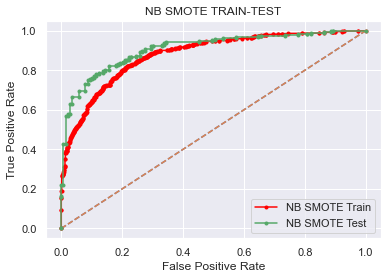

In [269]:
# AUC and ROC for the training data

# calculate AUC
NB_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_NB_SM_model[:,1])
print('AUC for the Training Data: %.3f' % NB_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_NB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'NB SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
NB_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_NB_SM_model[:,1])
print('AUC for the Test Data: %.3f' % NB_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='NB SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB SMOTE TRAIN-TEST')
plt.show()

In [270]:
NB_SM_metrics=classification_report(y_train_res, y_train_predict_NB_SM ,output_dict=True)
dfNB_SM_=pd.DataFrame(NB_SM_metrics).transpose()
NB_SM_train_precision=round(dfNB_SM_.loc["1.0"][0],2)
NB_SM_train_recall=round(dfNB_SM_.loc["1.0"][1],2)
NB_SM_train_f1=round(dfNB_SM_.loc["1.0"][2],2)
NB_SM_train_acc=round(dfNB_SM_.iloc[2,1],2)
print ('NB_SM_train_precision ',NB_SM_train_precision)
print ('NB_SM_train_recall ',NB_SM_train_recall)
print ('NB_SM_train_f1 ',NB_SM_train_f1)
print ('NB_SM_train_acc ',NB_SM_train_acc)

NB_SM_train_precision  0.79
NB_SM_train_recall  0.82
NB_SM_train_f1  0.8
NB_SM_train_acc  0.8


In [271]:
NB_SM_metrics=classification_report(y_test, y_test_predict_NB_SM ,output_dict=True)
dfNB_SM_=pd.DataFrame(NB_SM_metrics).transpose()
NB_SM_test_precision=round(dfNB_SM_.loc["1.0"][0],2)
NB_SM_test_recall=round(dfNB_SM_.loc["1.0"][1],2)
NB_SM_test_f1=round(dfNB_SM_.loc["1.0"][2],2)
NB_SM_test_acc=round(dfNB_SM_.iloc[2,1],2)
print ('NB_SM_test_precision ',NB_SM_test_precision)
print ('NB_SM_test_recall ',NB_SM_test_recall)
print ('NB_SM_test_f1 ',NB_SM_test_f1)
print ('NB_SM_test_acc ',NB_SM_test_acc)

NB_SM_test_precision  0.91
NB_SM_test_recall  0.83
NB_SM_test_f1  0.87
NB_SM_test_acc  0.82


### AdaBoost with SMOTE

In [272]:
from sklearn.ensemble import AdaBoostClassifier

ADB_SM = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_SM.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [273]:
# Training Data Probability Prediction
pred_prob_train_ADB_SM_model = ADB_SM.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_ADB_SM_model = ADB_SM.predict_proba(X_test)

In [274]:
## Performance Matrix on train data set with SMOTE
y_train_predict_ADB_SM = ADB_SM.predict(X_train_res)
model_score = ADB_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_ADB_SM))

0.8615591397849462
[[652  92]
 [114 630]]


In [275]:
## Performance Matrix on test data set
y_test_predict_ADB_SM = ADB_SM.predict(X_test)
model_score = ADB_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_ADB_SM))

0.8253275109170306
[[105  34]
 [ 46 273]]


In [276]:
print('Classification Report ADB SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_ADB_SM),'\n\n')
print('Classification Report ADB SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_ADB_SM),'\n')

Classification Report ADB SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       744
         1.0       0.87      0.85      0.86       744

    accuracy                           0.86      1488
   macro avg       0.86      0.86      0.86      1488
weighted avg       0.86      0.86      0.86      1488
 


Classification Report ADB SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.70      0.76      0.72       139
         1.0       0.89      0.86      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.942
AUC for the Test Data: 0.901


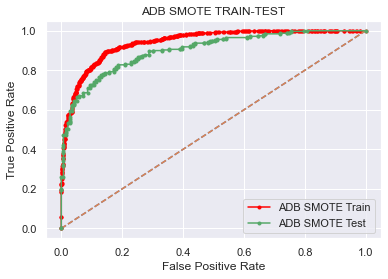

In [277]:
# AUC and ROC for the training data

# calculate AUC
ADB_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_ADB_SM_model[:,1])
print('AUC for the Training Data: %.3f' % ADB_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_ADB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'ADB SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
ADB_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_ADB_SM_model[:,1])
print('AUC for the Test Data: %.3f' % ADB_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_ADB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='ADB SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADB SMOTE TRAIN-TEST')
plt.show()

In [278]:
ADB_SM_metrics=classification_report(y_train_res, y_train_predict_ADB_SM ,output_dict=True)
dfADB_SM_=pd.DataFrame(ADB_SM_metrics).transpose()
ADB_SM_train_precision=round(dfADB_SM_.loc["1.0"][0],2)
ADB_SM_train_recall=round(dfADB_SM_.loc["1.0"][1],2)
ADB_SM_train_f1=round(dfADB_SM_.loc["1.0"][2],2)
ADB_SM_train_acc=round(dfADB_SM_.iloc[2,1],2)
print ('ADB_SM_train_precision ',ADB_SM_train_precision)
print ('ADB_SM_train_recall ',ADB_SM_train_recall)
print ('ADB_SM_train_f1 ',ADB_SM_train_f1)
print ('ADB_SM_train_acc ',ADB_SM_train_acc)

ADB_SM_train_precision  0.87
ADB_SM_train_recall  0.85
ADB_SM_train_f1  0.86
ADB_SM_train_acc  0.86


In [279]:
ADB_SM_metrics=classification_report(y_test, y_test_predict_ADB_SM ,output_dict=True)
dfADB_SM_=pd.DataFrame(ADB_SM_metrics).transpose()
ADB_SM_test_precision=round(dfADB_SM_.loc["1.0"][0],2)
ADB_SM_test_recall=round(dfADB_SM_.loc["1.0"][1],2)
ADB_SM_test_f1=round(dfADB_SM_.loc["1.0"][2],2)
ADB_SM_test_acc=round(dfADB_SM_.iloc[2,1],2)
print ('ADB_SM_test_precision ',ADB_SM_test_precision)
print ('ADB_SM_test_recall ',ADB_SM_test_recall)
print ('ADB_SM_test_f1 ',ADB_SM_test_f1)
print ('ADB_SM_test_acc ',ADB_SM_test_acc)

ADB_SM_test_precision  0.89
ADB_SM_test_recall  0.86
ADB_SM_test_f1  0.87
ADB_SM_test_acc  0.83


### Gradient Boosting With SMOTE

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_SM = GradientBoostingClassifier(random_state=1)
gbcl_SM = gbcl_SM.fit(X_train_res, y_train_res)

In [281]:
# Training Data Probability Prediction
pred_prob_train_gbcl_SM_model = gbcl_SM.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_gbcl_SM_model = gbcl_SM.predict_proba(X_test)

In [282]:
## Performance Matrix on train data set with SMOTE
y_train_predict_gbcl_SM = gbcl_SM.predict(X_train_res)
model_score = gbcl_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_gbcl_SM))

0.9038978494623656
[[679  65]
 [ 78 666]]


In [283]:
## Performance Matrix on test data set
y_test_predict_gbcl_SM = gbcl_SM.predict(X_test)
model_score = gbcl_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gbcl_SM))

0.8406113537117904
[[101  38]
 [ 35 284]]


In [284]:
print('Classification Report Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_gbcl_SM),'\n\n\n')
print('Classification Report Test:\n\n',metrics.classification_report(y_test, y_test_predict_gbcl_SM),'\n')

Classification Report Train :

               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       744
         1.0       0.91      0.90      0.90       744

    accuracy                           0.90      1488
   macro avg       0.90      0.90      0.90      1488
weighted avg       0.90      0.90      0.90      1488
 



Classification Report Test:

               precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       139
         1.0       0.88      0.89      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458
 



AUC for the Training Data: 0.967
AUC for the Test Data: 0.906


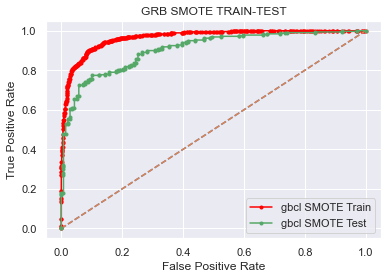

In [285]:
# AUC and ROC for the training data

# calculate AUC
gbcl_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_gbcl_SM_model[:,1])
print('AUC for the Training Data: %.3f' % gbcl_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_gbcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'gbcl SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
gbcl_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl_SM_model[:,1])
print('AUC for the Test Data: %.3f' % gbcl_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='gbcl SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GRB SMOTE TRAIN-TEST')
plt.show()

In [286]:
gbcl_SM_metrics=classification_report(y_train_res, y_train_predict_gbcl_SM ,output_dict=True)
dfgbcl_SM_=pd.DataFrame(gbcl_SM_metrics).transpose()
gbcl_SM_train_precision=round(dfgbcl_SM_.loc["1.0"][0],2)
gbcl_SM_train_recall=round(dfgbcl_SM_.loc["1.0"][1],2)
gbcl_SM_train_f1=round(dfgbcl_SM_.loc["1.0"][2],2)
gbcl_SM_train_acc=round(dfgbcl_SM_.iloc[2,1],2)
print ('gbcl_SM_train_precision ',gbcl_SM_train_precision)
print ('gbcl_SM_train_recall ',gbcl_SM_train_recall)
print ('gbcl_SM_train_f1 ',gbcl_SM_train_f1)
print ('gbcl_SM_train_acc ',gbcl_SM_train_acc)

gbcl_SM_train_precision  0.91
gbcl_SM_train_recall  0.9
gbcl_SM_train_f1  0.9
gbcl_SM_train_acc  0.9


In [287]:
gbcl_SM_metrics=classification_report(y_test, y_test_predict_gbcl_SM ,output_dict=True)
dfgbcl_SM_=pd.DataFrame(gbcl_SM_metrics).transpose()
gbcl_SM_test_precision=round(dfgbcl_SM_.loc["1.0"][0],2)
gbcl_SM_test_recall=round(dfgbcl_SM_.loc["1.0"][1],2)
gbcl_SM_test_f1=round(dfgbcl_SM_.loc["1.0"][2],2)
gbcl_SM_test_acc=round(dfgbcl_SM_.iloc[2,1],2)
print ('gbcl_SM_test_precision ',gbcl_SM_test_precision)
print ('gbcl_SM_test_recall ',gbcl_SM_test_recall)
print ('gbcl_SM_test_f1 ',gbcl_SM_test_f1)
print ('gbcl_SM_test_acc ',gbcl_SM_test_acc)

gbcl_SM_test_precision  0.88
gbcl_SM_test_recall  0.89
gbcl_SM_test_f1  0.89
gbcl_SM_test_acc  0.84


### Bagging with SMOTE

In [288]:
from sklearn.ensemble import BaggingClassifier

bgcl_SM = BaggingClassifier(base_estimator=RF ) 
bgcl_SM = bgcl_SM.fit(X_train_res, y_train_res)

In [289]:
# Training Data Probability Prediction
pred_prob_train_bgcl_SM_model = bgcl_SM.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_test_bgcl_SM_model = bgcl_SM.predict_proba(X_test)

In [290]:
## Performance Matrix on train data set with SMOTE
y_train_predict_bgcl_SM = bgcl_SM.predict(X_train_res)
model_score = bgcl_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_bgcl_SM))

0.9737903225806451
[[728  16]
 [ 23 721]]


In [291]:
## Performance Matrix on test data set
y_test_predict_bgcl_SM = bgcl_SM.predict(X_test)
model_score = bgcl_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_bgcl_SM))

0.8646288209606987
[[105  34]
 [ 28 291]]


In [292]:
print('Classification Report Bagging with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_bgcl_SM),'\n\n')
print('Classification Report Bagging with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_bgcl_SM),'\n')

Classification Report Bagging with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       744
         1.0       0.98      0.97      0.97       744

    accuracy                           0.97      1488
   macro avg       0.97      0.97      0.97      1488
weighted avg       0.97      0.97      0.97      1488
 


Classification Report Bagging with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.79      0.76      0.77       139
         1.0       0.90      0.91      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.83      0.84       458
weighted avg       0.86      0.86      0.86       458
 



AUC for the Training Data: 0.998
AUC for the Test Data: 0.913


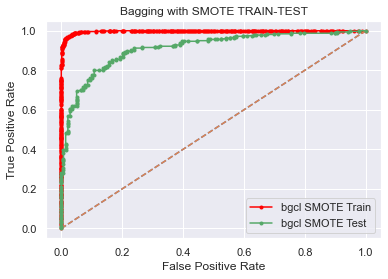

In [293]:
# AUC and ROC for the training data

# calculate AUC
bgcl_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_bgcl_SM_model[:,1])
print('AUC for the Training Data: %.3f' % bgcl_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_bgcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'bgcl SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
bgcl_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_bgcl_SM_model[:,1])
print('AUC for the Test Data: %.3f' % bgcl_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_bgcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='bgcl SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging with SMOTE TRAIN-TEST')
plt.show()

In [294]:
bgcl_SM_metrics=classification_report(y_train_res, y_train_predict_bgcl_SM ,output_dict=True)
dfbgcl_SM_=pd.DataFrame(bgcl_SM_metrics).transpose()
bgcl_SM_train_precision=round(dfbgcl_SM_.loc["1.0"][0],2)
bgcl_SM_train_recall=round(dfbgcl_SM_.loc["1.0"][1],2)
bgcl_SM_train_f1=round(dfbgcl_SM_.loc["1.0"][2],2)
bgcl_SM_train_acc=round(dfbgcl_SM_.iloc[2,1],2)
print ('bgcl_SM_train_precision ',bgcl_SM_train_precision)
print ('bgcl_SM_train_recall ',bgcl_SM_train_recall)
print ('bgcl_SM_train_f1 ',bgcl_SM_train_f1)
print ('bgcl_SM_train_acc ',bgcl_SM_train_acc)

bgcl_SM_train_precision  0.98
bgcl_SM_train_recall  0.97
bgcl_SM_train_f1  0.97
bgcl_SM_train_acc  0.97


In [295]:
bgcl_SM_metrics=classification_report(y_test, y_test_predict_bgcl_SM ,output_dict=True)
dfbgcl_SM_=pd.DataFrame(bgcl_SM_metrics).transpose()
bgcl_SM_test_precision=round(dfbgcl_SM_.loc["1.0"][0],2)
bgcl_SM_test_recall=round(dfbgcl_SM_.loc["1.0"][1],2)
bgcl_SM_test_f1=round(dfbgcl_SM_.loc["1.0"][2],2)
bgcl_SM_test_acc=round(dfbgcl_SM_.iloc[2,1],2)
print ('bgcl_SM_test_precision ',bgcl_SM_test_precision)
print ('bgcl_SM_test_recall ',bgcl_SM_test_recall)
print ('bgcl_SM_test_f1 ',bgcl_SM_test_f1)
print ('bgcl_SM_test_acc ',bgcl_SM_test_acc)

bgcl_SM_test_precision  0.9
bgcl_SM_test_recall  0.91
bgcl_SM_test_f1  0.9
bgcl_SM_test_acc  0.86


*********************************************************

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

*******************************************

### Logistic Regression Base Model Performance Metrics

In [296]:
print('LogReg base-model Train:\n',confusion_matrix(y_train, ytrain_predict_lr),'\n')
print('LogReg base-model Test:\n',confusion_matrix(y_test, ytest_predict_lr))

LogReg base-model Train:
 [[211 112]
 [ 69 675]] 

LogReg base-model Test:
 [[ 94  45]
 [ 24 295]]


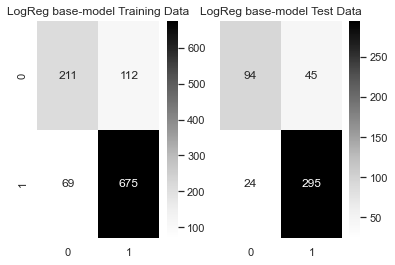

In [297]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LogReg base-model Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LogReg base-model Test Data');


In [298]:
print('Classification Report of LogReg base-model training data:\n\n',metrics.classification_report(y_train, ytrain_predict_lr),'\n')
print('Classification Report of LogReg base-model test data:\n\n',metrics.classification_report(y_test, ytest_predict_lr),'\n')

Classification Report of LogReg base-model training data:

               precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       323
         1.0       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of LogReg base-model test data:

               precision    recall  f1-score   support

         0.0       0.80      0.68      0.73       139
         1.0       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458
 



AUC: 0.877
AUC: 0.914


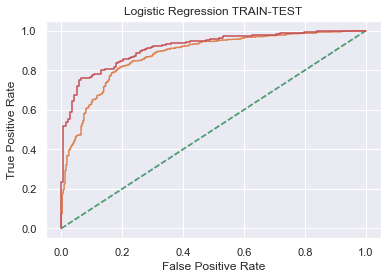

In [299]:
# AUC-ROC Train-Test

# predict probabilities
probs = logreg_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# predict probabilities
probs = logreg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression TRAIN-TEST')
plt.show()

### Logistic Regression Hypertuned Model Performance Metrics

In [300]:
print('LogReg tuned-model Train:\n',confusion_matrix(y_train, ytrain_predict_gs_lr),'\n')
print('LogReg tuned-model Test:\n',confusion_matrix(y_test,ytest_predict_gs_lr))

LogReg tuned-model Train:
 [[209 114]
 [ 70 674]] 

LogReg tuned-model Test:
 [[ 92  47]
 [ 22 297]]


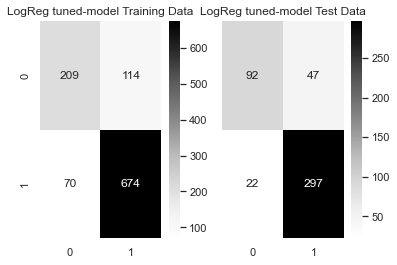

In [301]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_gs_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LogReg tuned-model Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gs_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LogReg tuned-model Test Data');


In [302]:
print('Classification Report Grid search Train :\n\n',metrics.classification_report(y_train, ytrain_predict_gs_lr),'\n\n\n')
print('Classification Report Grid search test:\n\n',metrics.classification_report(y_test,ytest_predict_gs_lr),'\n')

Classification Report Grid search Train :

               precision    recall  f1-score   support

         0.0       0.75      0.65      0.69       323
         1.0       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 



Classification Report Grid search test:

               precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       139
         1.0       0.86      0.93      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.81       458
weighted avg       0.85      0.85      0.84       458
 



AUC: 0.877
AUC: 0.914


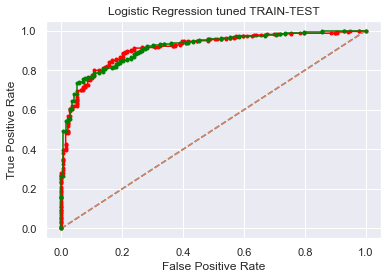

In [303]:
# AUC-ROC Train-Test

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_tuned_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_tuned_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--',label='test data')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label = 'Testing Data',color='green');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression tuned TRAIN-TEST')
plt.show()

### Logistic Regression with SMOTE Model Performance Metrics

In [304]:
print('LogReg with SMOTE Train:\n',confusion_matrix(y_train_res, y_train_predict_logreg_SM),'\n')
print('LogReg with SMOTE Test:\n',confusion_matrix(y_test, y_test_predict_logreg_SM))

LogReg with SMOTE Train:
 [[594 150]
 [138 606]] 

LogReg with SMOTE Test:
 [[114  25]
 [ 53 266]]


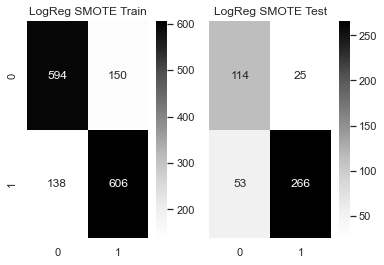

In [305]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_logreg_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LogReg SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_logreg_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LogReg SMOTE Test');


In [306]:
print('Classification Report Log-reg with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_logreg_SM),'\n\n\n')
print('Classification Report Log-reg with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_logreg_SM),'\n')

Classification Report Log-reg with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       744
         1.0       0.80      0.81      0.81       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488
 



Classification Report Log-reg with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.68      0.82      0.75       139
         1.0       0.91      0.83      0.87       319

    accuracy                           0.83       458
   macro avg       0.80      0.83      0.81       458
weighted avg       0.84      0.83      0.83       458
 



AUC for the Training Data: 0.879
AUC for the Test Data: 0.915


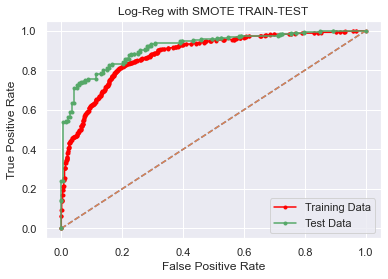

In [307]:
# AUC and ROC for the training data

# calculate AUC
logreg_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_logreg_SM[:,1])
print('AUC for the Training Data: %.3f' % logreg_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_logreg_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the logreg_SM_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
logreg_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_logreg_SM[:,1])
print('AUC for the Test Data: %.3f' % logreg_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_logreg_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the logreg_SM_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log-Reg with SMOTE TRAIN-TEST')
plt.show()

***************************************************************

************************************************

### LDA Base Model Performance Metrics

In [308]:
print('LDA base-model Train:\n',metrics.confusion_matrix(y_train1,pred_class_train_lda),'\n')
print('LDA base-model Test:\n',metrics.confusion_matrix(y_test1,pred_class_test_lda),'\n')

LDA base-model Train:
 [[215 108]
 [ 78 666]] 

LDA base-model Test:
 [[ 97  42]
 [ 29 290]] 



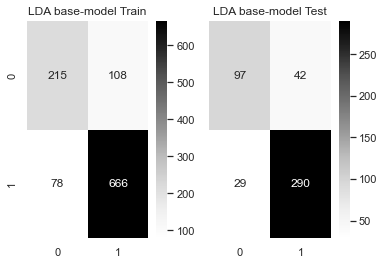

In [309]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train1,pred_class_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA base-model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test1,pred_class_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA base-model Test');


In [310]:
print('Classification Report of the LDA training data:\n\n',metrics.classification_report(y_train1,pred_class_train_lda),'\n')
print('Classification Report of the LDA test data:\n\n',metrics.classification_report(y_test1,pred_class_test_lda),'\n')

Classification Report of the LDA training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the LDA test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


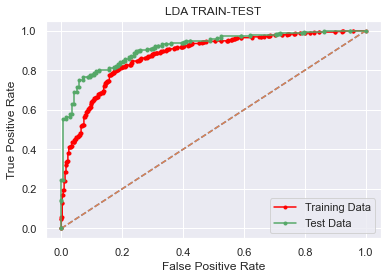

In [311]:
# AUC and ROC for the training data

# calculate AUC
LDA_default_train_auc = metrics.roc_auc_score(y_train1,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % LDA_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train1,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
LDA_default_test_auc = metrics.roc_auc_score(y_test1,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % LDA_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA TRAIN-TEST')
plt.show()

### LDA Hypertuned model Performance Metrics

In [312]:
print('LDA tuned-model Train:\n',metrics.confusion_matrix(y_train, ytrain_predict_gs_lda),'\n')
print('LDA tuned-model Test:\n',metrics.confusion_matrix(y_test, ytest_predict_gs_lda),'\n')

LDA tuned-model Train:
 [[  0 323]
 [  0 744]] 

LDA tuned-model Test:
 [[  0 139]
 [  0 319]] 



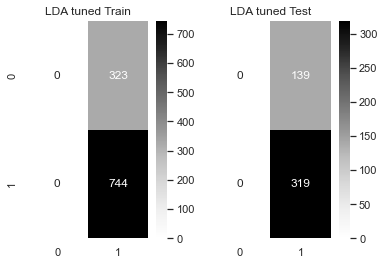

In [313]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_gs_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA tuned Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_gs_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA tuned Test');

In [314]:
print('Classification Report of the hypertuned training data:\n\n',classification_report(y_train, ytrain_predict_gs_lda),'\n')
print('Classification Report of the hypertuned testing data:\n\n',classification_report(y_test, ytest_predict_gs_lda))

Classification Report of the hypertuned training data:

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       323
         1.0       0.70      1.00      0.82       744

    accuracy                           0.70      1067
   macro avg       0.35      0.50      0.41      1067
weighted avg       0.49      0.70      0.57      1067
 

Classification Report of the hypertuned testing data:

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       139
         1.0       0.70      1.00      0.82       319

    accuracy                           0.70       458
   macro avg       0.35      0.50      0.41       458
weighted avg       0.49      0.70      0.57       458



AUC: 0.877
AUC: 0.914


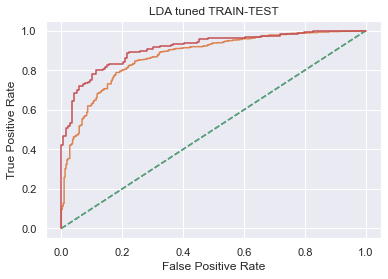

In [315]:
# AUC-ROC Train-Test

# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_tuned_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# predict probabilities
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_tuned_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA tuned TRAIN-TEST')
plt.show()

### LDA model with SMOTE Performance Metrics

In [316]:
print('LDA with SMOTE Train:\n',metrics.confusion_matrix(y_train_res, y_train_predict_lda_SM),'\n')
print('LDA with SMOTE Test:\n',metrics.confusion_matrix(y_test, y_test_predict_lda_SM))

LDA with SMOTE Train:
 [[597 147]
 [140 604]] 

LDA with SMOTE Test:
 [[113  26]
 [ 56 263]]


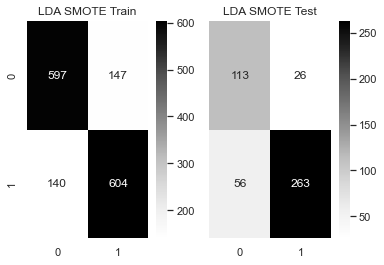

In [317]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_lda_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_lda_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA SMOTE Test');

In [318]:
print('Classification Report LDA with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_lda_SM),'\n\n\n')
print('Classification Report LDA with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_lda_SM),'\n')

Classification Report LDA with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       744
         1.0       0.80      0.81      0.81       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488
 



Classification Report LDA with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 



AUC for the Training Data: 0.879
AUC for the Test Data: 0.913


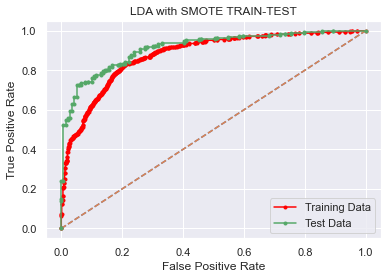

In [319]:
# AUC and ROC for the training data

# calculate AUC
lda_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_lda_SM[:,1])
print('AUC for the Training Data: %.3f' % lda_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_lda_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
lda_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_lda_SM[:,1])
print('AUC for the Test Data: %.3f' % lda_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA with SMOTE TRAIN-TEST')
plt.show()

### LDA model with custom cuttoff (after using SMOTE)

In [320]:
print('LDA with SMOTE Test:\n',metrics.confusion_matrix(y_test, y_test_predict_lda_SM),'\n')
print('LDA with Custom Cutoff Train:\n',metrics.confusion_matrix(y_test,data_pred_custom_cutoff))

LDA with SMOTE Test:
 [[113  26]
 [ 56 263]] 

LDA with Custom Cutoff Train:
 [[ 89  50]
 [ 20 299]]


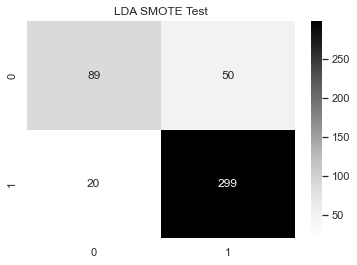

In [321]:
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');
plt.title('LDA SMOTE Test');

In [322]:
print('Classification Report of the LDA with SMOTE Test data:\n\n',metrics.classification_report(y_test, y_test_predict_lda_SM),'\n\n\n')
print('Classification Report of the Custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the LDA with SMOTE Test data:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 



Classification Report of the Custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       139
         1.0       0.86      0.94      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458
 



AUC for the Test Data: 0.819


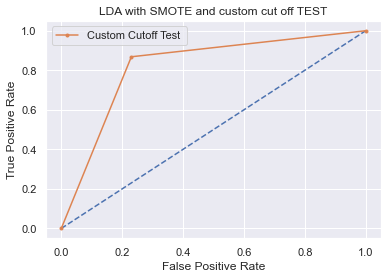

In [323]:

# AUC and ROC for the test data

# calculate AUC
lda_SM_CC_test_auc = metrics.roc_auc_score(y_test,y_predsm_cc)
print('AUC for the Test Data: %.3f' % lda_SM_CC_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predsm_cc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_SM_model
plt.plot(fpr, tpr, marker='.',label='Custom Cutoff Test ')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA with SMOTE and custom cut off TEST')
plt.show()

*******************************************

************************************************

### KNN base model Performance Metrics

In [324]:
print('KNN base-model Train:\n',metrics.confusion_matrix(y_train, y_train_predict_knn),'\n')
print('KNN base-model Train:\n',metrics.confusion_matrix(y_test, y_test_predict_knn))

KNN base-model Train:
 [[238  85]
 [ 57 687]] 

KNN base-model Train:
 [[101  38]
 [ 32 287]]


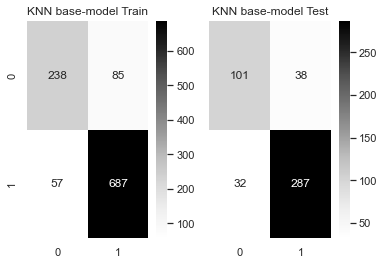

In [325]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict_knn)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('KNN base-model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_knn)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('KNN base-model Test');

In [326]:
print('Classification Report of KNN base-model training data:\n\n',metrics.classification_report(y_train, y_train_predict_knn),'\n')
print('Classification Report of KNN base-model test data:\n\n',metrics.classification_report(y_test, y_test_predict_knn),'\n')

Classification Report of KNN base-model training data:

               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       323
         1.0       0.89      0.92      0.91       744

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.87      1067
 

Classification Report of KNN base-model test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



AUC for the Training Data: 0.933
AUC for the Test Data: 0.871


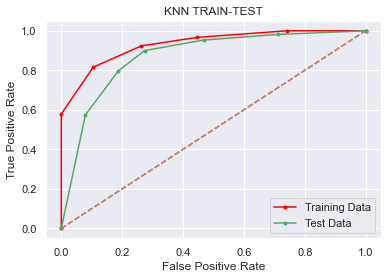

In [327]:
# AUC and ROC for the training data

# calculate AUC
knn_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_knn[:,1])
print('AUC for the Training Data: %.3f' % knn_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
knn_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_knn[:,1])
print('AUC for the Test Data: %.3f' % knn_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN TRAIN-TEST')
plt.show()

### KNN Hypertuned model Performance Metrics

In [328]:
print('KNN tuned-model Train:\n',metrics.confusion_matrix(y_train, y_train_predict_knn2 ),'\n')
print('KNN tuned-model Train:\n',metrics.confusion_matrix(y_test, y_test_predict_knn2 ))

KNN tuned-model Train:
 [[219 104]
 [ 73 671]] 

KNN tuned-model Train:
 [[100  39]
 [ 23 296]]


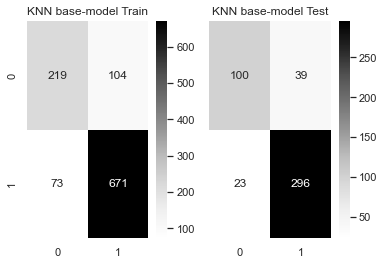

In [329]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict_knn2)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('KNN base-model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_knn2)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('KNN base-model Test');

In [330]:
print('Classification Report KNN for k=13 train :\n\n',metrics.classification_report(y_train, y_train_predict_knn2 ),'\n\n\n')
print('Classification Report KNN for k=13 test:\n\n',metrics.classification_report(y_test,y_test_predict_knn2 ),'\n')

Classification Report KNN for k=13 train :

               precision    recall  f1-score   support

         0.0       0.75      0.68      0.71       323
         1.0       0.87      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 



Classification Report KNN for k=13 test:

               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       139
         1.0       0.88      0.93      0.91       319

    accuracy                           0.86       458
   macro avg       0.85      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458
 



AUC for the Training Data: 0.908
AUC for the Test Data: 0.897


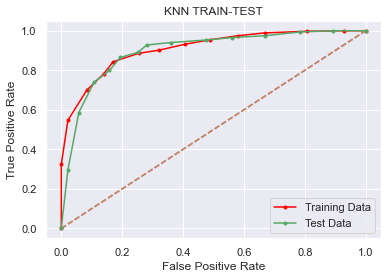

In [331]:
# AUC and ROC for the training data

# calculate AUC
knn_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_knn2[:,1])
print('AUC for the Training Data: %.3f' % knn_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_knn2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
knn_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_knn2[:,1])
print('AUC for the Test Data: %.3f' % knn_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_knn2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN TRAIN-TEST')
plt.show()

### KNN with SMOTE

In [332]:
print('KNN  with SMOTE Train:\n',metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM),'\n')
print('KNN  with SMOTE Test:\n',metrics.confusion_matrix(y_test, y_test_predict_KNN_SM))

KNN  with SMOTE Train:
 [[701  43]
 [126 618]] 

KNN  with SMOTE Test:
 [[113  26]
 [ 61 258]]


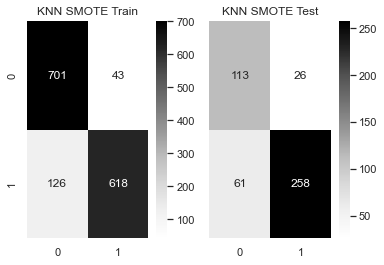

In [333]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('KNN SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_KNN_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('KNN SMOTE Test');

In [334]:
print('Classification Report KNN with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_KNN_SM),'\n\n\n')
print('Classification Report KNN with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM),'\n')

Classification Report KNN with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       744
         1.0       0.93      0.83      0.88       744

    accuracy                           0.89      1488
   macro avg       0.89      0.89      0.89      1488
weighted avg       0.89      0.89      0.89      1488
 



Classification Report KNN with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       139
         1.0       0.91      0.81      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.81      0.82       458
 



AUC for the Training Data: 0.966
AUC for the Test Data: 0.868


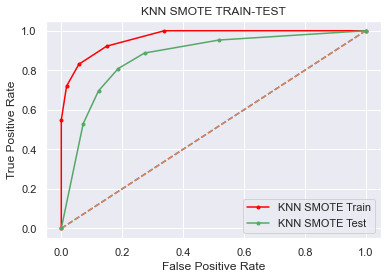

In [335]:
# AUC and ROC for the training data

# calculate AUC
KNN_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_KNN_SM_model[:,1])
print('AUC for the Training Data: %.3f' % KNN_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_KNN_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model_model
plt.plot(fpr, tpr, marker='.',label = 'KNN SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_KNN_SM_model[:,1])
print('AUC for the Test Data: %.3f' % KNN_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model_model
plt.plot(fpr, tpr, marker='.',label='KNN SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN SMOTE TRAIN-TEST')
plt.show()

### KNN SMOTE and Tuned

In [336]:
print('KNN with SMOTE tuned train:\n',metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM17),'\n')
print('KNN with SMOTE tuned test:\n',metrics.confusion_matrix(y_test, y_test_predict_KNN_SM17))

KNN with SMOTE tuned train:
 [[663  81]
 [145 599]] 

KNN with SMOTE tuned test:
 [[112  27]
 [ 56 263]]


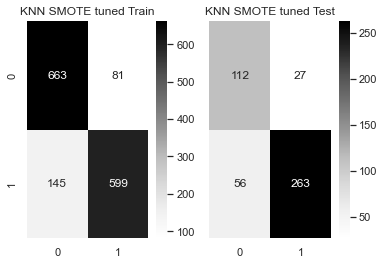

In [337]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_KNN_SM17)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('KNN SMOTE tuned Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_KNN_SM17)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('KNN SMOTE tuned Test');

In [338]:
print('Classification Report KNN with SMOTE tuned  train:\n\n',metrics.classification_report(y_train_res, y_train_predict_KNN_SM17 ),'\n\n')
print('Classification Report KNN With SMOTE tuned test:\n\n',metrics.classification_report(y_test, y_test_predict_KNN_SM17 ),'\n')

Classification Report KNN with SMOTE tuned  train:

               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       744
         1.0       0.88      0.81      0.84       744

    accuracy                           0.85      1488
   macro avg       0.85      0.85      0.85      1488
weighted avg       0.85      0.85      0.85      1488
 


Classification Report KNN With SMOTE tuned test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.82      0.86       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.83      0.82      0.82       458
 



AUC for the Training Data: 0.929
AUC for the Test Data: 0.894


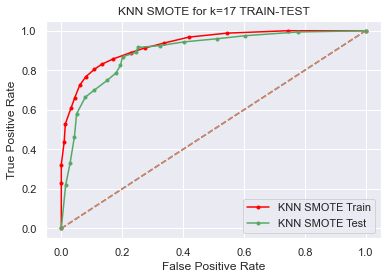

In [339]:
# AUC and ROC for the training data

# calculate AUC
KNN_SM17_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_KNN_SM_model17[:,1])
print('AUC for the Training Data: %.3f' % KNN_SM17_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_KNN_SM_model17[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model17_model17
plt.plot(fpr, tpr, marker='.',label = 'KNN SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
KNN_SM17_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_KNN_SM_model17[:,1])
print('AUC for the Test Data: %.3f' % KNN_SM17_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN_SM_model17[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the KNN_SM_model17_model17
plt.plot(fpr, tpr, marker='.',label='KNN SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN SMOTE for k=17 TRAIN-TEST')
plt.show()

## Naive Bayes Default

In [340]:
print('NB default Train:\n',metrics.confusion_matrix(y_train, y_train_predict_NB),'\n')
print('NB default Test:\n',metrics.confusion_matrix(y_test, y_test_predict_NB))

NB default Train:
 [[223 100]
 [ 90 654]] 

NB default Test:
 [[101  38]
 [ 32 287]]


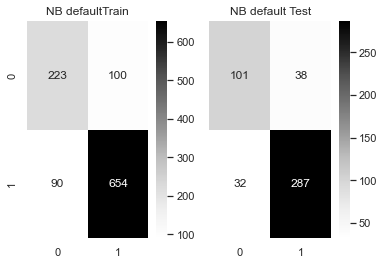

In [341]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict_NB)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('NB defaultTrain')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_NB)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('NB default Test');

In [342]:
print('Classification Report of NB default training data:\n\n',metrics.classification_report(y_train, y_train_predict_NB),'\n')
print('Classification Report of NB default data:\n\n',metrics.classification_report(y_test, y_test_predict_NB),'\n')

Classification Report of NB default training data:

               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       323
         1.0       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of NB default data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



AUC for the Training Data: 0.874
AUC for the Test Data: 0.910


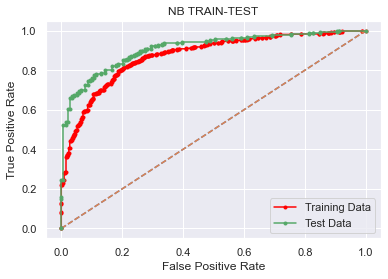

In [343]:
# AUC and ROC for the training data

# calculate AUC
NB_default_train_auc = metrics.roc_auc_score(y_train1,pred_prob_train_NB[:,1])
print('AUC for the Training Data: %.3f' % NB_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
NB_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_NB[:,1])
print('AUC for the Test Data: %.3f' % NB_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB TRAIN-TEST')
plt.show()

### Naive Bayes with SMOTE

In [344]:
print('Naive Bayes with SMOTE Train:\n',metrics.confusion_matrix(y_train_res, y_train_predict_NB_SM),'\n')
print('Naive Bayes with SMOTE Test:\n',metrics.confusion_matrix(y_test, y_test_predict_NB_SM))

Naive Bayes with SMOTE Train:
 [[583 161]
 [136 608]] 

Naive Bayes with SMOTE Test:
 [[112  27]
 [ 54 265]]


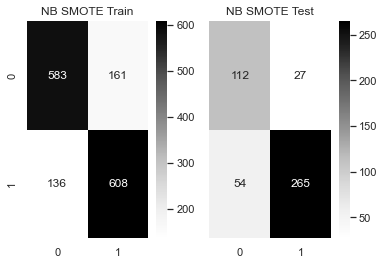

In [345]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_NB_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('NB SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_NB_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('NB SMOTE Test');

In [346]:
print('Classification Report NB SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_NB_SM),'\n\n\n')
print('Classification Report NB SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_NB_SM),'\n')

Classification Report NB SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       744
         1.0       0.79      0.82      0.80       744

    accuracy                           0.80      1488
   macro avg       0.80      0.80      0.80      1488
weighted avg       0.80      0.80      0.80      1488
 



Classification Report NB SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       139
         1.0       0.91      0.83      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458
 



AUC for the Training Data: 0.880
AUC for the Test Data: 0.909


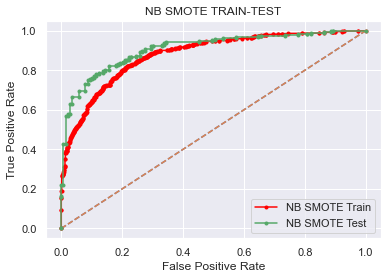

In [347]:
# AUC and ROC for the training data

# calculate AUC
NB_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_NB_SM_model[:,1])
print('AUC for the Training Data: %.3f' % NB_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_NB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'NB SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
NB_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_NB_SM_model[:,1])
print('AUC for the Test Data: %.3f' % NB_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the NB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='NB SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB SMOTE TRAIN-TEST')
plt.show()

*****************************************

### ADA Boost default Model

In [348]:
print('ADB default Train:\n',metrics.confusion_matrix(y_train, y_train_pred_adb),'\n')
print('ADB default Train:\n',metrics.confusion_matrix(y_test, y_test_pred_adb))

ADB default Train:
 [[227  96]
 [ 70 674]] 

ADB default Train:
 [[ 94  45]
 [ 33 286]]


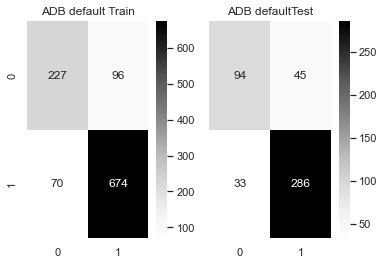

In [349]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_train_pred_adb)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('ADB default Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_pred_adb)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('ADB defaultTest');

In [350]:
print('Classification Report ADB train :\n\n',metrics.classification_report(y_train, y_train_pred_adb ),'\n\n')
print('Classification Report ADB test:\n\n',metrics.classification_report(y_test,y_test_pred_adb ),'\n')

Classification Report ADB train :

               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       323
         1.0       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 


Classification Report ADB test:

               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       139
         1.0       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.899
AUC for the Test Data: 0.906


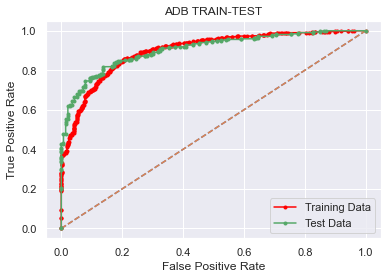

In [351]:
# AUC and ROC for the training data

# calculate AUC
ADB_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_adb[:,1])
print('AUC for the Training Data: %.3f' % ADB_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_adb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
ADB_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_adb[:,1])
print('AUC for the Test Data: %.3f' % ADB_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_adb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADB TRAIN-TEST')
plt.show()

### ADA Boost with SMOTE Model

In [352]:
print('ADB SMOTE Train :\n',metrics.confusion_matrix(y_train_res, y_train_predict_ADB_SM),'\n')
print('ADB SMOTE Test :\n',metrics.confusion_matrix(y_test, y_test_predict_ADB_SM))

ADB SMOTE Train :
 [[652  92]
 [114 630]] 

ADB SMOTE Test :
 [[105  34]
 [ 46 273]]


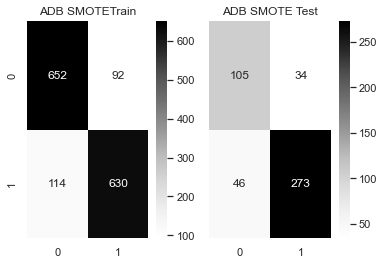

In [353]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_ADB_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('ADB SMOTETrain')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_ADB_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('ADB SMOTE Test');

In [354]:
print('Classification Report ADB SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_ADB_SM),'\n\n')
print('Classification Report ADB SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_ADB_SM),'\n')

Classification Report ADB SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       744
         1.0       0.87      0.85      0.86       744

    accuracy                           0.86      1488
   macro avg       0.86      0.86      0.86      1488
weighted avg       0.86      0.86      0.86      1488
 


Classification Report ADB SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.70      0.76      0.72       139
         1.0       0.89      0.86      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.942
AUC for the Test Data: 0.901


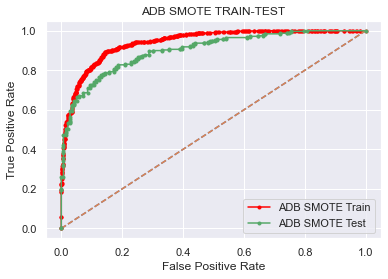

In [355]:
# AUC and ROC for the training data

# calculate AUC
ADB_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_ADB_SM_model[:,1])
print('AUC for the Training Data: %.3f' % ADB_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_ADB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'ADB SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
ADB_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_ADB_SM_model[:,1])
print('AUC for the Test Data: %.3f' % ADB_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_ADB_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the ADB_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='ADB SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADB SMOTE TRAIN-TEST')
plt.show()

### Gradient Boost Default

In [356]:
print('GRB train :\n',metrics.confusion_matrix(y_train, y_train_pred_gbcl),'\n')
print('GRB test :\n',metrics.confusion_matrix(y_test, y_test_pred_gbcl))

GRB train :
 [[246  77]
 [ 43 701]] 

GRB test :
 [[ 92  47]
 [ 27 292]]


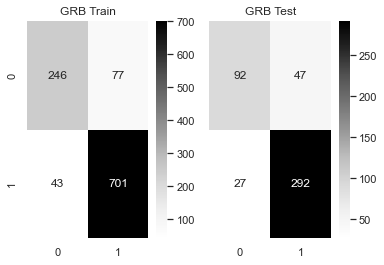

In [357]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_train_pred_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('GRB Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_pred_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('GRB Test');

In [358]:
print('Classification Report GRB train :\n\n',metrics.classification_report(y_train, y_train_pred_gbcl ),'\n')
print('Classification Report GRB test:\n\n',metrics.classification_report(y_test,y_test_pred_gbcl ),'\n')

Classification Report GRB train :

               precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       323
         1.0       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067
 

Classification Report GRB test:

               precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       139
         1.0       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458
 



AUC for the Training Data: 0.948
AUC for the Test Data: 0.908


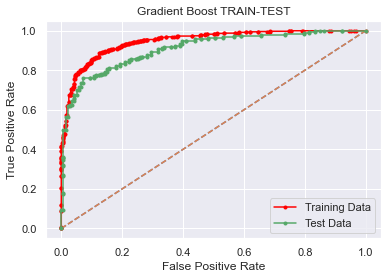

In [359]:
# AUC and ROC for the training data

# calculate AUC
gbcl_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_gbcl[:,1])
print('AUC for the Training Data: %.3f' % gbcl_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
gbcl_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl[:,1])
print('AUC for the Test Data: %.3f' % gbcl_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost TRAIN-TEST')
plt.show()

### Gradient Boost with SMOTE 

In [360]:
print('Gradient Boost with SMOTE Train :\n',metrics.confusion_matrix(y_train_res, y_train_predict_gbcl_SM),'\n')
print('Gradient Boost with SMOTE Test :\n',metrics.confusion_matrix(y_test, y_test_predict_gbcl_SM))

Gradient Boost with SMOTE Train :
 [[679  65]
 [ 78 666]] 

Gradient Boost with SMOTE Test :
 [[101  38]
 [ 35 284]]


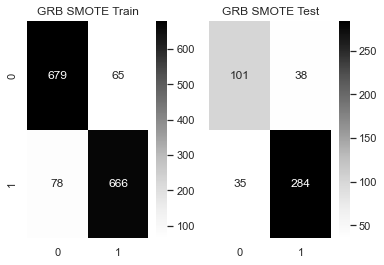

In [361]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_gbcl_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('GRB SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_gbcl_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('GRB SMOTE Test');

In [362]:
print('Classification Report Gradient Boost with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_gbcl_SM),'\n')
print('Classification Report Gradient Boost with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_gbcl_SM),'\n')

Classification Report Gradient Boost with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       744
         1.0       0.91      0.90      0.90       744

    accuracy                           0.90      1488
   macro avg       0.90      0.90      0.90      1488
weighted avg       0.90      0.90      0.90      1488
 

Classification Report Gradient Boost with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       139
         1.0       0.88      0.89      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458
 



AUC for the Training Data: 0.967
AUC for the Test Data: 0.906


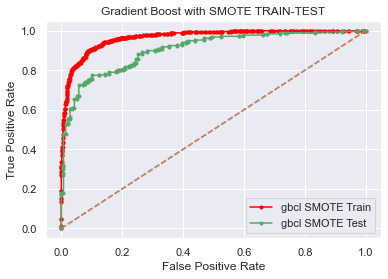

In [363]:
# AUC and ROC for the training data

# calculate AUC
gbcl_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_gbcl_SM_model[:,1])
print('AUC for the Training Data: %.3f' % gbcl_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_gbcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'gbcl SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
gbcl_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl_SM_model[:,1])
print('AUC for the Test Data: %.3f' % gbcl_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the gbcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='gbcl SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost with SMOTE TRAIN-TEST')
plt.show()

### Bagging with Tuned-Random Forest

In [364]:
print(' Bagging with tuned RF Train :\n',metrics.confusion_matrix(y_train,ytrain_predict_bgcl),'\n')
print(' Bagging with tuned RF Test:\n',metrics.confusion_matrix(y_test,ytest_predict_bgcl))

 Bagging with tuned RF Train :
 [[209 114]
 [ 54 690]] 

 Bagging with tuned RF Test:
 [[ 86  53]
 [ 21 298]]


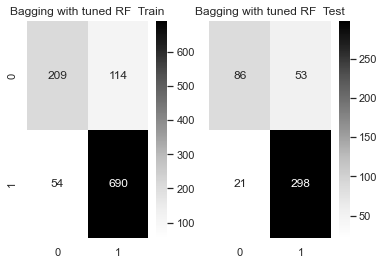

In [365]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_bgcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Bagging with tuned RF  Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bgcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Bagging with tuned RF  Test');

In [366]:
print('Classification Report Bagging with RF train :\n\n',metrics.classification_report(y_train, ytrain_predict_bgcl ),'\n')
print('Classification Report Bagging with RF test:\n\n',metrics.classification_report(y_test,ytest_predict_bgcl ),'\n')

Classification Report Bagging with RF train :

               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       323
         1.0       0.86      0.93      0.89       744

    accuracy                           0.84      1067
   macro avg       0.83      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report Bagging with RF test:

               precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       139
         1.0       0.85      0.93      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.78      0.79       458
weighted avg       0.84      0.84      0.83       458
 



AUC for the Training Data: 0.906
AUC for the Test Data: 0.911


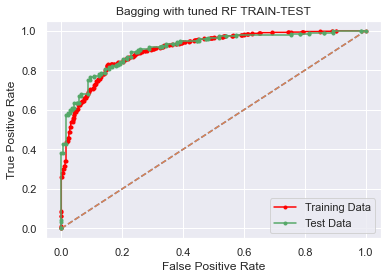

In [367]:
# AUC and ROC for the training data

# calculate AUC
Bagging_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_bgcl[:,1])
print('AUC for the Training Data: %.3f' % Bagging_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
Bagging_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_bgcl[:,1])
print('AUC for the Test Data: %.3f' % Bagging_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging with tuned RF TRAIN-TEST')
plt.show()

### Bagging with Tuned-Random Forest With SMOTE data

In [368]:
print(' Bagging with SMOTE Train :\n',metrics.confusion_matrix(y_train_res, y_train_predict_bgcl_SM),'\n')
print('Bagging with SMOTE Test :\n',metrics.confusion_matrix(y_test, y_test_predict_bgcl_SM))

 Bagging with SMOTE Train :
 [[728  16]
 [ 23 721]] 

Bagging with SMOTE Test :
 [[105  34]
 [ 28 291]]


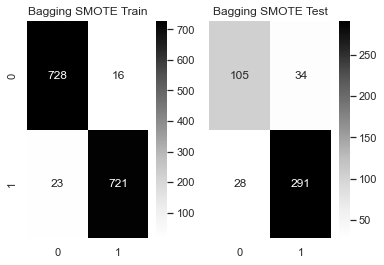

In [369]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict_bgcl_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Bagging SMOTE Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict_bgcl_SM)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Bagging SMOTE Test');

In [370]:
print('Classification Report Bagging with SMOTE Train :\n\n',metrics.classification_report(y_train_res, y_train_predict_bgcl_SM),'\n')
print('Classification Report Bagging with SMOTE Test:\n\n',metrics.classification_report(y_test, y_test_predict_bgcl_SM),'\n')

Classification Report Bagging with SMOTE Train :

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       744
         1.0       0.98      0.97      0.97       744

    accuracy                           0.97      1488
   macro avg       0.97      0.97      0.97      1488
weighted avg       0.97      0.97      0.97      1488
 

Classification Report Bagging with SMOTE Test:

               precision    recall  f1-score   support

         0.0       0.79      0.76      0.77       139
         1.0       0.90      0.91      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.83      0.84       458
weighted avg       0.86      0.86      0.86       458
 



AUC for the Training Data: 0.998
AUC for the Test Data: 0.913


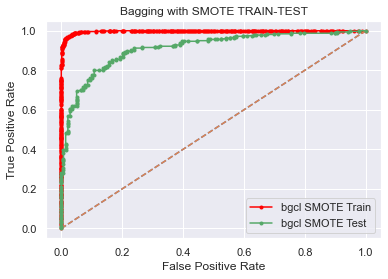

In [371]:
# AUC and ROC for the training data

# calculate AUC
bgcl_SM_train_auc = metrics.roc_auc_score(y_train_res,pred_prob_train_bgcl_SM_model[:,1])
print('AUC for the Training Data: %.3f' % bgcl_SM_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train_bgcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label = 'bgcl SMOTE Train',color='red')


# AUC and ROC for the test data

# calculate AUC
bgcl_SM_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_bgcl_SM_model[:,1])
print('AUC for the Test Data: %.3f' % bgcl_SM_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_bgcl_SM_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the bgcl_SM_model_model15
plt.plot(fpr, tpr, marker='.',label='bgcl SMOTE Test')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging with SMOTE TRAIN-TEST')
plt.show()

********************************************************************

# Final Model Comparisons

### Base Models Comparisons

In [372]:
# base models
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data1 = pd.DataFrame({'Log Reg Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'Log Reg Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'LDA_default Train':[LDA_default_train_acc,LDA_default_train_auc,LDA_default_train_recall,LDA_default_train_precision,LDA_default_train_f1],
        'LDA_default Test':[LDA_default_test_acc,LDA_default_test_auc,LDA_default_test_recall,LDA_default_test_precision,LDA_default_test_f1],
        'KNN_default Train':[KNN_default_train_acc,KNN_default_train_auc,KNN_default_train_recall,KNN_default_train_precision,KNN_default_train_f1],
        'KNN_default Test':[KNN_default_test_acc,KNN_default_test_auc,KNN_default_test_recall,KNN_default_test_precision,KNN_default_test_f1],
        'NB_default Train':[NB_default_train_acc,NB_default_train_auc,NB_default_train_recall,NB_default_train_precision,NB_default_train_f1],
        'NB_default Test':[NB_default_test_acc,NB_default_test_auc,NB_default_test_recall,NB_default_test_precision,NB_default_test_f1],
         'ADB_default_train':[ADB_default_train_acc,ADB_default_train_auc,ADB_default_train_recall,ADB_default_train_precision,ADB_default_train_f1],
        'ADB_default Test':[ADB_default_test_acc,ADB_default_test_auc,ADB_default_test_recall,ADB_default_test_precision,ADB_default_test_f1],
        'GRB_default_train':[GRB_default_train_acc,GRB_default_train_auc,GRB_default_train_recall,GRB_default_train_precision,GRB_default_train_f1],
        'GRB_default Test':[GRB_default_test_acc,GRB_default_test_auc,GRB_default_test_recall,GRB_default_test_precision,GRB_default_test_f1],
        'RF_default_train':[RF_default_train_acc,RF_default_train_auc,RF_default_train_recall,RF_default_train_precision,RF_default_train_f1],
        'RF_default Test':[RF_default_test_acc,RF_default_test_auc,RF_default_test_recall,RF_default_test_precision,RF_default_test_f1],          
        'Bagging_default_train':[Bagging_default_train_acc,Bagging_default_train_auc,Bagging_default_train_recall,Bagging_default_train_precision,Bagging_default_train_f1],
        'Bagging_default Test':[Bagging_default_test_acc,Bagging_default_test_auc,Bagging_default_test_recall,Bagging_default_test_precision,Bagging_default_test_f1],
        
                     
                    },index=index)
round(data1,2).T

,Accuracy,AUC,Recall,Precision,F1 Score
Log Reg Train,0.83,0.88,0.91,0.86,0.88
Log Reg Test,0.85,0.91,0.92,0.87,0.90
LDA_default Train,0.83,0.88,0.90,0.86,0.88
LDA_default Test,0.84,0.91,0.91,0.87,0.89
KNN_default Train,0.87,0.93,0.92,0.89,0.91
KNN_default Test,0.85,0.87,0.90,0.88,0.89
NB_default Train,0.82,0.87,0.88,0.87,0.87
NB_default Test,0.85,0.91,0.90,0.88,0.89
ADB_default_train,0.84,0.90,0.91,0.88,0.89
ADB_default Test,0.83,0.91,0.90,0.86,0.88


### Hypertuned Models Comparisons

In [373]:
# TUNED

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data2 = pd.DataFrame({
        'Log Reg_tuned Train':[logreg_tuned_train_acc,logreg_tuned_train_auc,logreg_tuned_train_recall,logreg_tuned_train_precision,logreg_tuned_train_f1],
        'Log Reg_tuned Test':[logreg_tuned_test_acc,logreg_tuned_test_auc,logreg_tuned_test_recall,logreg_tuned_test_precision,logreg_tuned_test_f1],
        'LDA_tuned_train':[LDA_tuned_train_acc,LDA_tuned_train_auc,LDA_tuned_train_recall,LDA_tuned_train_precision,LDA_tuned_train_f1],
        'LDA_tuned Test':[LDA_tuned_test_acc,LDA_tuned_test_auc,LDA_tuned_test_recall,LDA_tuned_test_precision,LDA_tuned_test_f1],
        'KNN_tuned_train':[KNN_tuned_train_acc,KNN_tuned_train_auc,KNN_tuned_train_recall,KNN_tuned_train_precision,KNN_tuned_train_f1],
        'KNN_tuned Test':[KNN_tuned_test_acc,KNN_tuned_test_auc,KNN_tuned_test_recall,KNN_tuned_test_precision,KNN_tuned_test_f1],
        'gs_RF_default_train':[gs_RF_default_train_acc,gs_RF_default_train_auc,gs_RF_default_train_recall,gs_RF_default_train_precision,gs_RF_default_train_f1],
        'gs_RF_default Test':[gs_RF_default_test_acc,gs_RF_default_test_auc,gs_RF_default_test_recall,gs_RF_default_test_precision,gs_RF_default_test_f1],
        
                     
                     
                    },index=index)
round(data2,2).T

,Accuracy,AUC,Recall,Precision,F1 Score
Log Reg_tuned Train,0.83,0.88,0.91,0.86,0.88
Log Reg_tuned Test,0.85,0.91,0.93,0.86,0.90
LDA_tuned_train,0.70,0.87,1.00,0.70,0.82
LDA_tuned Test,0.70,0.91,1.00,0.70,0.82
KNN_tuned_train,0.83,0.91,0.90,0.87,0.88
KNN_tuned Test,0.86,0.90,0.93,0.88,0.91
gs_RF_default_train,0.85,0.92,0.93,0.87,0.90
gs_RF_default Test,0.85,0.91,0.93,0.86,0.89


### Models with SMOTE comparisons

In [374]:
#WITH SMOTE


index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data3 = pd.DataFrame({
        'logreg_SM Train':[logreg_SM_train_acc,logreg_SM_train_auc,logreg_SM_train_recall,logreg_SM_train_precision,logreg_SM_train_f1],
        'logreg_SM Test':[logreg_SM_test_acc,logreg_SM_test_auc,logreg_SM_test_recall,logreg_SM_test_precision,logreg_SM_test_f1],
        'lda_SM Train':[lda_SM_train_acc,lda_SM_train_auc,lda_SM_train_recall,lda_SM_train_precision,lda_SM_train_f1],
        'lda_SM Test':[lda_SM_test_acc,lda_SM_test_auc,lda_SM_test_recall,lda_SM_test_precision,lda_SM_test_f1],
        'KNN_SM Train':[KNN_SM_train_acc,KNN_SM_train_auc,KNN_SM_train_recall,KNN_SM_train_precision,KNN_SM_train_f1],
        'KNN_SM Test':[KNN_SM_test_acc,KNN_SM_test_auc,KNN_SM_test_recall,KNN_SM_test_precision,KNN_SM_test_f1],
         'NB_SM Train':[NB_SM_train_acc,NB_SM_train_auc,NB_SM_train_recall,NB_SM_train_precision,NB_SM_train_f1],
        'NB_SM Test':[NB_SM_test_acc,NB_SM_test_auc,NB_SM_test_recall,NB_SM_test_precision,NB_SM_test_f1],            
         'ADB_SM Train':[ADB_SM_train_acc,ADB_SM_train_auc,ADB_SM_train_recall,ADB_SM_train_precision,ADB_SM_train_f1],
        'ADB_SM Test':[ADB_SM_test_acc,ADB_SM_test_auc,ADB_SM_test_recall,ADB_SM_test_precision,ADB_SM_test_f1],
        'gbcl_SM Train':[gbcl_SM_train_acc,gbcl_SM_train_auc,gbcl_SM_train_recall,gbcl_SM_train_precision,gbcl_SM_train_f1],
        'gbcl_SM Test':[gbcl_SM_test_acc,gbcl_SM_test_auc,gbcl_SM_test_recall,gbcl_SM_test_precision,gbcl_SM_test_f1],             
        'bgcl_SM Train':[bgcl_SM_train_acc,bgcl_SM_train_auc,bgcl_SM_train_recall,bgcl_SM_train_precision,bgcl_SM_train_f1],
        'bgcl_SM Test':[bgcl_SM_test_acc,bgcl_SM_test_auc,bgcl_SM_test_recall,bgcl_SM_test_precision,bgcl_SM_test_f1] 
                     
                     
                    },index=index)
round(data3,2).T

,Accuracy,AUC,Recall,Precision,F1 Score
logreg_SM Train,0.81,0.88,0.81,0.80,0.81
logreg_SM Test,0.83,0.92,0.83,0.91,0.87
lda_SM Train,0.81,0.88,0.81,0.80,0.81
lda_SM Test,0.82,0.91,0.82,0.91,0.87
KNN_SM Train,0.89,0.97,0.83,0.93,0.88
KNN_SM Test,0.81,0.87,0.81,0.91,0.86
NB_SM Train,0.80,0.88,0.82,0.79,0.80
NB_SM Test,0.82,0.91,0.83,0.91,0.87
ADB_SM Train,0.86,0.94,0.85,0.87,0.86
ADB_SM Test,0.83,0.90,0.86,0.89,0.87


### SMOTE+Tuned Model Comparisons

In [375]:
#Tuning after SMOTE

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data4 = pd.DataFrame({
        
        'LDA_SM_CC Test':[lda_SM_CC_test_acc,lda_SM_CC_test_auc,lda_SM_CC_test_recall,lda_SM_CC_test_precision,lda_SM_CC_test_f1],
          'KNN_SM17 Train':[KNN_SM17_train_acc,KNN_SM17_train_auc,KNN_SM17_train_recall,KNN_SM17_train_precision,KNN_SM17_train_f1],
        'KNN_SM17 Test':[KNN_SM17_test_acc,KNN_SM17_test_auc,KNN_SM17_test_recall,KNN_SM17_test_precision,KNN_SM17_test_f1],
         },index=index)
round(data4,2).T

,Accuracy,AUC,Recall,Precision,F1 Score
LDA_SM_CC Test,0.85,0.82,0.94,0.86,0.90
KNN_SM17 Train,0.85,0.93,0.81,0.88,0.84
KNN_SM17 Test,0.82,0.89,0.82,0.91,0.86


***********************************************************

## Problem 2:

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

In [376]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\JYOTI\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [377]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [378]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [379]:
all_words=[]
def lower(x):
    for w in x.words():
        words=w.lower()
        all_words.append(words)
        
lower(inaugural)


In [380]:
R_char = inaugural.raw('1941-Roosevelt.txt')
K_char = inaugural.raw('1961-Kennedy.txt')
N_char = inaugural.raw('1973-Nixon.txt')
print('Characters count for 1941-Roosevelt speech is =', len(R_char))
print('Characters count for 1961-Kennedy speech is =', len(K_char))
print('Characters count for 1973-Nixon speech is =', len(N_char))

Characters count for 1941-Roosevelt speech is = 7571
Characters count for 1961-Kennedy speech is = 7618
Characters count for 1973-Nixon speech is = 9991


In [381]:
R_words = inaugural.words('1941-Roosevelt.txt')
K_words = inaugural.words('1961-Kennedy.txt')
N_words = inaugural.words('1973-Nixon.txt')
print('Words count for 1941-Roosevelt speech is =', len(R_words))
print('Words count for 1961-Kennedy speech is =', len(K_words))
print('Words count for 1973-Nixon speech is =', len(N_words))

Words count for 1941-Roosevelt speech is = 1536
Words count for 1961-Kennedy speech is = 1546
Words count for 1973-Nixon speech is = 2028


In [382]:
from nltk.tokenize import sent_tokenize
sent1 = R_char
sent2 = K_char
sent3 = N_char
R_sen = sent_tokenize(sent1)
K_sen = sent_tokenize(sent2)
N_sen = sent_tokenize(sent3)
print('Sentences count for 1941-Roosevelt speech is =', len(R_sen))
print('Sentences count for 1961-Kennedy speech is =', len(K_sen))
print('Sentences count for 1973-Nixon speech is =', len(N_sen))

Sentences count for 1941-Roosevelt speech is = 68
Sentences count for 1961-Kennedy speech is = 52
Sentences count for 1973-Nixon speech is = 68


In [383]:
Roosevelt=pd.DataFrame(data=R_sen,columns=['Speech'])
Kennedy=pd.DataFrame(data=K_sen,columns=['Speech'])
Nixon=pd.DataFrame(data=N_sen,columns=['Speech'])

In [384]:
all_words_R = [x for x in pd.Series(' '.join(Roosevelt['Speech']).lower().split())] 
all_words_k = [x for x in pd.Series(' '.join(Kennedy['Speech']).lower().split())] 
all_words_N = [x for x in pd.Series(' '.join(Nixon['Speech']).lower().split())] 
print('Words count without spaces for 1941-Roosevelt speech is =', len(all_words_R))
print('Words count without spaces for 1961-Kennedy speech is =', len(all_words_k))
print('Words count without spaces for 1973-Nixon speech is =', len(all_words_N))

Words count without spaces for 1941-Roosevelt speech is = 1360
Words count without spaces for 1961-Kennedy speech is = 1390
Words count without spaces for 1973-Nixon speech is = 1819


## 2.2 Remove all the stopwords from all three speeches

In [385]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)
stopwords.append('--')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [386]:
import numpy as np
import pandas as pd

all_words=[]
def lower(x):
    for w in x.words():
        words=w.lower()
        all_words.append(words)
        
lower(inaugural)


## Roosevelt

In [387]:
Roosevelt=pd.DataFrame(data=R_sen,columns=['Speech'])
Roosevelt.head()

,Speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."


In [388]:
Roosevelt['stopwords'] = Roosevelt['Speech'].apply(lambda x: len([x for x in x.lower().split() if x in stopwords]))
Roosevelt.head()

,Speech,stopwords
0,On each national day of inauguration since 178...,9
1,In Washington's day the task of the people was...,8
2,In Lincoln's day the task of the people was to...,9
3,In this day the task of the people is to save ...,12
4,"To us there has come a time, in the midst of s...",25


In [389]:
Roosevelt['clean'] = Roosevelt['Speech'].apply(lambda x: " ".join([x for x in x.lower().split() if x not in stopwords]))
Roosevelt.head(10)

,Speech,stopwords,clean
0,On each national day of inauguration since 178...,9,"national day inauguration since 1789, people r..."
1,In Washington's day the task of the people was...,8,washington's day task people create weld toget...
2,In Lincoln's day the task of the people was to...,9,lincoln's day task people preserve nation disr...
3,In this day the task of the people is to save ...,12,day task people save nation institutions disru...
4,"To us there has come a time, in the midst of s...",25,"us come time, midst swift happenings, pause mo..."
5,"If we do not, we risk the real peril of inaction.",6,"not, risk real peril inaction."
6,Lives of nations are determined not by the cou...,11,"lives nations determined count years, lifetime..."
7,The life of a man is three-score years and ten...,7,"life man three-score years ten: little more, l..."
8,The life of a nation is the fullness of the me...,11,life nation fullness measure live.
9,There are men who doubt this.,3,men doubt this.


In [390]:
all_words_R = [x for x in pd.Series(' '.join(Roosevelt['Speech']).lower().split())] 
all_words_clean_R = [word for word in all_words_R if word not in stopwords]

In [391]:
Length_R=len(all_words_R)
Length_R

1360

In [392]:
Roosevelt['stopwords'].sum()

716

In [393]:
Length_R_after_stopwords_removal=len(all_words_clean_R)
Length_R_after_stopwords_removal

644

In [394]:
print("Sentence 1 Roosevelt\n",all_words_clean_R[0:27],'\n')
print("Sentence 2 Roosevelt\n",all_words_clean_R[27:35])

Sentence 1 Roosevelt
 ['national', 'day', 'inauguration', 'since', '1789,', 'people', 'renewed', 'sense', 'dedication', 'united', 'states.', "washington's", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation.', "lincoln's", 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within.'] 

Sentence 2 Roosevelt
 ['day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without.']


## Kennedy

In [395]:
Kennedy=pd.DataFrame(data=K_sen,columns=['Speech'])
Kennedy.head()

,Speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,For I have sworn I before you and Almighty God...
2,The world is very different now.
3,For man holds in his mortal hands the power to...
4,And yet the same revolutionary beliefs for whi...


In [396]:
Kennedy['stopwords'] = Kennedy['Speech'].apply(lambda x: len([x for x in x.lower().split() if x in stopwords]))
Kennedy.head()

,Speech,stopwords
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",15
1,For I have sworn I before you and Almighty God...,12
2,The world is very different now.,3
3,For man holds in his mortal hands the power to...,10
4,And yet the same revolutionary beliefs for whi...,23


In [397]:
Kennedy['clean'] = Kennedy['Speech'].apply(lambda x: " ".join([x for x in x.lower().split() if x not in stopwords]))
Kennedy.head(10)

,Speech,stopwords,clean
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",15,"vice president johnson, mr. speaker, mr. chief..."
1,For I have sworn I before you and Almighty God...,12,sworn almighty god solemn oath forebears l pre...
2,The world is very different now.,3,world different now.
3,For man holds in his mortal hands the power to...,10,man holds mortal hands power abolish forms hum...
4,And yet the same revolutionary beliefs for whi...,23,yet revolutionary beliefs forebears fought sti...
5,We dare not forget today that we are the heirs...,8,dare forget today heirs first revolution.
6,Let the word go forth from this time and place...,42,"let word go forth time place, friend foe alike..."
7,"Let every nation know, whether it wishes us we...",15,"let every nation know, whether wishes us well ..."
8,This much we pledge -- and more.,4,much pledge more.
9,To those old allies whose cultural and spiritu...,7,old allies whose cultural spiritual origins sh...


In [398]:
all_words_k = [x for x in pd.Series(' '.join(Kennedy['Speech']).lower().split())] 

In [399]:
all_words_clean_k = [word for word in all_words_k if word not in stopwords]

In [400]:
Length_k=len(all_words_k)
Length_k

1390

In [401]:
Kennedy['stopwords'].sum()

684

In [402]:
Length_k_after_stopwords_removal=len(all_words_clean_k)
Length_k_after_stopwords_removal

706

In [403]:
print("Sentence 1 Kennedy\n",all_words_clean_k[0:33],'\n')
print("Sentence 2 Kennedy\n",all_words_clean_k[33:49])

Sentence 1 Kennedy
 ['vice', 'president', 'johnson,', 'mr.', 'speaker,', 'mr.', 'chief', 'justice,', 'president', 'eisenhower,', 'vice', 'president', 'nixon,', 'president', 'truman,', 'reverend', 'clergy,', 'fellow', 'citizens,', 'observe', 'today', 'victory', 'party,', 'celebration', 'freedom', 'symbolizing', 'end,', 'well', 'beginning', 'signifying', 'renewal,', 'well', 'change.'] 

Sentence 2 Kennedy
 ['sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago.', 'world', 'different', 'now.']


## NIXON

In [404]:
Nixon=pd.DataFrame(data=N_sen,columns=['Speech'])
Nixon.head()

,Speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"As we meet here today, we stand on the thresho..."
2,The central question before us is: How shall w...
3,Let us resolve that this era we are about to e...
4,Let us resolve that this will be what it can b...


In [405]:
Nixon['stopwords'] = Nixon['Speech'].apply(lambda x: len([x for x in x.lower().split() if x in stopwords]))
Nixon.head()

,Speech,stopwords
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",17
1,"As we meet here today, we stand on the thresho...",11
2,The central question before us is: How shall w...,5
3,Let us resolve that this era we are about to e...,20
4,Let us resolve that this will be what it can b...,21


In [406]:
Nixon['clean'] = Nixon['Speech'].apply(lambda x: " ".join([x for x in x.lower().split() if x not in stopwords]))
Nixon.head(10)

,Speech,stopwords,clean
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",17,"mr. vice president, mr. speaker, mr. chief jus..."
1,"As we meet here today, we stand on the thresho...",11,"meet today, stand threshold new era peace world."
2,The central question before us is: How shall w...,5,central question us is: shall use peace?
3,Let us resolve that this era we are about to e...,20,let us resolve era enter postwar periods often...
4,Let us resolve that this will be what it can b...,21,let us resolve become: time great responsibili...
5,This past year saw far-reaching results from o...,4,past year saw far-reaching results new policie...
6,By continuing to revitalize our traditional fr...,21,"continuing revitalize traditional friendships,..."
7,"Because of America's bold initiatives, 1972 wi...",13,"america's bold initiatives, 1972 long remember..."
8,The peace we seek in the world is not the flim...,17,peace seek world flimsy peace merely interlude...
9,It is important that we understand both the ne...,11,important understand necessity limitations ame...


In [407]:
all_words_N = [x for x in pd.Series(' '.join(Nixon['Speech']).lower().split())] 
all_words_clean_N = [word for word in all_words_N if word not in stopwords]
print("Sentence 1 Nixon\n",all_words_clean_N[0:35])

Sentence 1 Nixon
 ['mr.', 'vice', 'president,', 'mr.', 'speaker,', 'mr.', 'chief', 'justice,', 'senator', 'cook,', 'mrs.', 'eisenhower,', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together:', 'met', 'four', 'years', 'ago,', 'america', 'bleak', 'spirit,', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home.']


In [408]:
Nixon['stopwords'].sum()

975

In [409]:
Length_N=len(all_words_N)
Length_N

1819

In [410]:
Length_N_after_stopwords_removal=len(all_words_clean_N)
Length_N_after_stopwords_removal

844

********************************************************

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [411]:
Roosevelt_freq=nltk.FreqDist(all_words_clean_R).most_common(3)
Roosevelt_freq

[('know', 9), ('us', 8), ('life', 6)]

In [412]:
Kennedy_freq=nltk.FreqDist(all_words_clean_k).most_common(3)
Kennedy_freq

[('let', 16), ('us', 11), ('new', 7)]

In [413]:
Nixon_freq=nltk.FreqDist(all_words_clean_N).most_common(3)
Nixon_freq

[('us', 25), ('let', 22), ('new', 15)]

*******************************************

## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [414]:
import matplotlib.pyplot as plt 

In [415]:
from wordcloud import WordCloud

In [416]:
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


### Roosevelt speech

Word Cloud for 1941-Roosevelt speech is


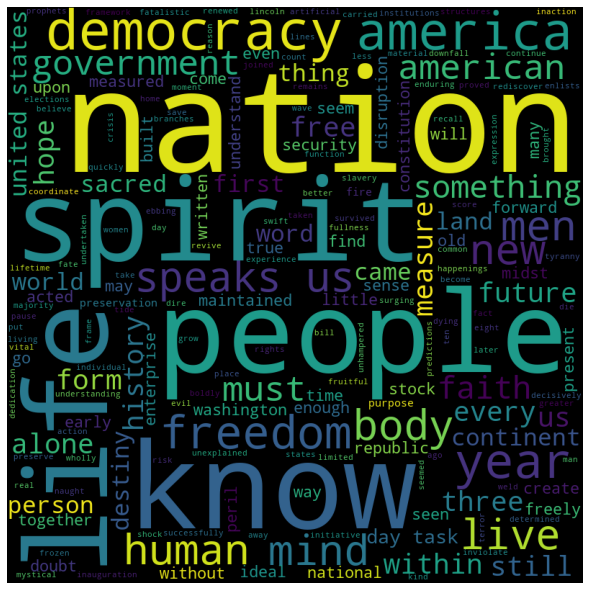

In [417]:
print('Word Cloud for 1941-Roosevelt speech is')
word_cloud((" ").join(all_words_clean_R))

### Kennedy's speech

Word Cloud for 1961-Kennedy's speech is


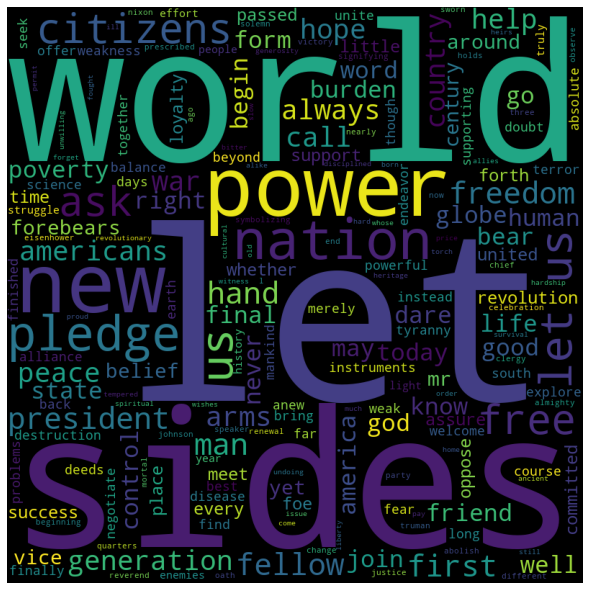

In [418]:
print("Word Cloud for 1961-Kennedy's speech is")
word_cloud((" ").join(all_words_clean_k))

### Nixon's speech

Word Cloud for 1973-Nixon's speech is


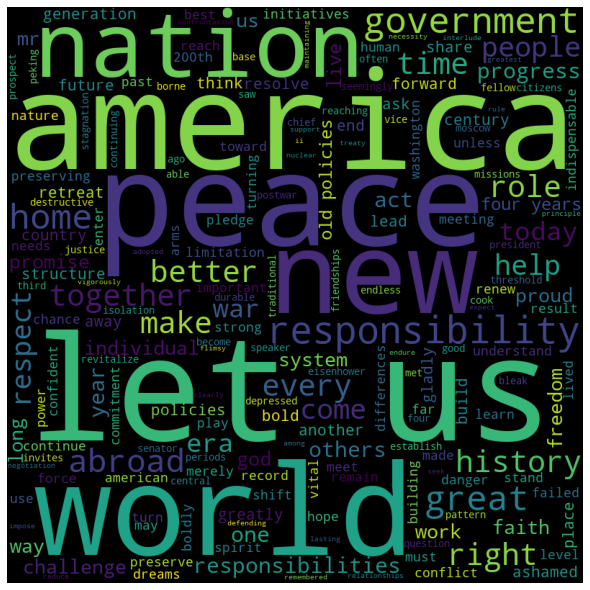

In [419]:
print("Word Cloud for 1973-Nixon's speech is")
word_cloud((" ").join(all_words_clean_N))